# 뇌종양의 지름길이 비교, 약의 효과는 있는가?
control, Neurohib, Mitostop.

In [1]:
#뇌종양의 지름길이 비교, 약의 효과는 있는가?
group = c ("C", "C","C","C", "N","N","N","N", "M","M","M","M")
#control Neurohib Mitostop.
brain = c (7,8,9,11,8,7,5,4,5,4,2,1)
data = data.frame(group=group,brain=brain)
result = aov(brain ~ group, data = data)
summary(result) # F-value가 10.8이고 이에 해당하는 p-value는 0.004이므로 유의수준 0.05보다 작다. 따라서 약의 효과는 있다.

            Df Sum Sq Mean Sq F value  Pr(>F)   
group        2  66.17   33.08   10.36 0.00463 **
Residuals    9  28.75    3.19                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

분산분석 결과 F-value가 10.8이고 이에 해당하는 p-value는 0.004이므로 유의수준 0.05보다 작다. 따라서 약의 효과는 있다.

In [11]:
#resizing plots using IRKernel 
#https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html
library(repr)
options(repr.plot.width=3 , repr.plot.height=3)

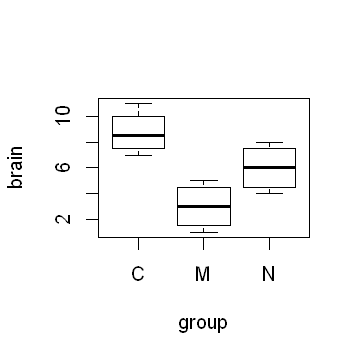

In [12]:
boxplot(brain ~ group)

튜키 테스트는 고전적인 방법이여서 잘 쓰지 않는다. 

In [2]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = brain ~ group, data = data)

$group
     diff        lwr        upr     p adj
M-C -5.75 -9.2785718 -2.2214282 0.0035553
N-C -2.75 -6.2785718  0.7785718 0.1291820
N-M  3.00 -0.5285718  6.5285718 0.0956282


M,C pair만 유의미한 차이가 있다. 

In [ ]:
# install.packages("agricolae")
# library(agricolae)

Multiple Comparisons, "Least Significant Difference" And Adjust P-Values
Multiple comparisons of treatments by means of LSD and a grouping of treatments. The level by alpha default is 0.05. Returns p-values adjusted using one of several methods

▶ 최소유의차방법 : 최소유의차(LSD)방법은 최소유의차(LSD)값을 기준값으로 사용하여 평균들의 가능한 모든 짝비교를 하는 방법이다. 평균의 짝비교는 두 평균의 차이를 기준값과 비교하는 것이다. 
[출처] http://blog.naver.com/PostView.nhn?blogId=jindog2929&logNo=10120978410

$statistics
   MSerror Df     Mean      CV  t.value      MSD
  3.194444  9 5.916667 30.2079 2.933324 3.707172

$parameters
        test  p.ajusted name.t ntr alpha
  Fisher-LSD bonferroni  group   3  0.05

$means
  brain      std r       LCL       UCL Min Max  Q25 Q50  Q75
C  8.75 1.707825 4 6.7284223 10.771578   7  11 7.75 8.5 9.50
M  3.00 1.825742 4 0.9784223  5.021578   1   5 1.75 3.0 4.25
N  6.00 1.825742 4 3.9784223  8.021578   4   8 4.75 6.0 7.25

$comparison
NULL

$groups
  brain groups
C  8.75      a
N  6.00     ab
M  3.00      b

attr(,"class")
[1] "group"

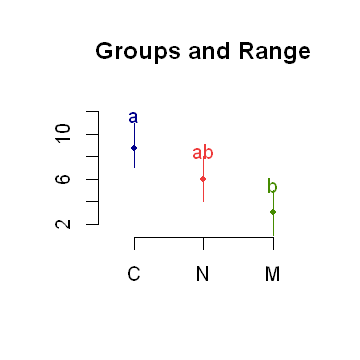

In [13]:
comparison = LSD.test(result,
                      "group",p.adj="bonferroni",
                      group=T)
comparison
plot(comparison)

$statistics
   MSerror Df     Mean      CV  t.value      MSD
  3.194444  9 5.916667 30.2079 2.262157 2.858943

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD       fdr  group   3  0.05

$means
  brain      std r       LCL       UCL Min Max  Q25 Q50  Q75
C  8.75 1.707825 4 6.7284223 10.771578   7  11 7.75 8.5 9.50
M  3.00 1.825742 4 0.9784223  5.021578   1   5 1.75 3.0 4.25
N  6.00 1.825742 4 3.9784223  8.021578   4   8 4.75 6.0 7.25

$comparison
NULL

$groups
  brain groups
C  8.75      a
N  6.00     ab
M  3.00      b

attr(,"class")
[1] "group"

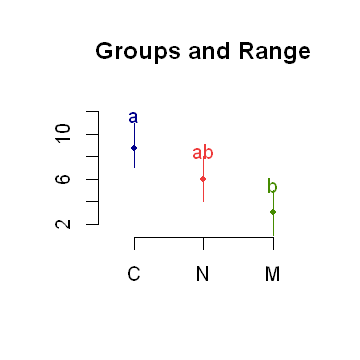

In [14]:
comparison = LSD.test(result,
                      "group",p.adj="fdr",
                      group=T)
comparison
plot(comparison)

# 살충제효과가있는가?
어떤스프레이가가장효과가있는가?

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


     count       spray 
 Min.   : 0.00   A:12  
 1st Qu.: 3.00   B:12  
 Median : 7.00   C:12  
 Mean   : 9.50   D:12  
 3rd Qu.:14.25   E:12  
 Max.   :26.00   F:12  

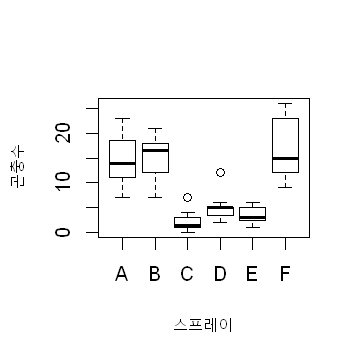

In [16]:
data(InsectSprays)
head(InsectSprays)
attach(InsectSprays)
summary(InsectSprays)
boxplot(count ~ spray,
xlab= "스프레이",
ylab= "곤충수")

In [17]:
result = aov(count ~ spray, data = InsectSprays)
summary(result)

            Df Sum Sq Mean Sq F value Pr(>F)    
spray        5   2669   533.8    34.7 <2e-16 ***
Residuals   66   1015    15.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = count ~ spray, data = InsectSprays)

$spray
           diff        lwr       upr     p adj
B-A   0.8333333  -3.866075  5.532742 0.9951810
C-A -12.4166667 -17.116075 -7.717258 0.0000000
D-A  -9.5833333 -14.282742 -4.883925 0.0000014
E-A -11.0000000 -15.699409 -6.300591 0.0000000
F-A   2.1666667  -2.532742  6.866075 0.7542147
C-B -13.2500000 -17.949409 -8.550591 0.0000000
D-B -10.4166667 -15.116075 -5.717258 0.0000002
E-B -11.8333333 -16.532742 -7.133925 0.0000000
F-B   1.3333333  -3.366075  6.032742 0.9603075
D-C   2.8333333  -1.866075  7.532742 0.4920707
E-C   1.4166667  -3.282742  6.116075 0.9488669
F-C  14.5833333   9.883925 19.282742 0.0000000
E-D  -1.4166667  -6.116075  3.282742 0.9488669
F-D  11.7500000   7.050591 16.449409 0.0000000
F-E  13.1666667   8.467258 17.866075 0.0000000


$statistics
   MSerror Df Mean       CV  t.value      MSD
  15.38131 66  9.5 41.28318 3.045792 4.876648

$parameters
        test  p.ajusted name.t ntr alpha
  Fisher-LSD bonferroni  spray   6  0.05

$means
      count      std  r        LCL       UCL Min Max   Q25  Q50   Q75
A 14.500000 4.719399 12 12.2395786 16.760421   7  23 11.50 14.0 17.75
B 15.333333 4.271115 12 13.0729119 17.593755   7  21 12.50 16.5 17.50
C  2.083333 1.975225 12 -0.1770881  4.343755   0   7  1.00  1.5  3.00
D  4.916667 2.503028 12  2.6562453  7.177088   2  12  3.75  5.0  5.00
E  3.500000 1.732051 12  1.2395786  5.760421   1   6  2.75  3.0  5.00
F 16.666667 6.213378 12 14.4062453 18.927088   9  26 12.50 15.0 22.50

$comparison
NULL

$groups
      count groups
F 16.666667      a
B 15.333333      a
A 14.500000      a
D  4.916667      b
E  3.500000      b
C  2.083333      b

attr(,"class")
[1] "group"

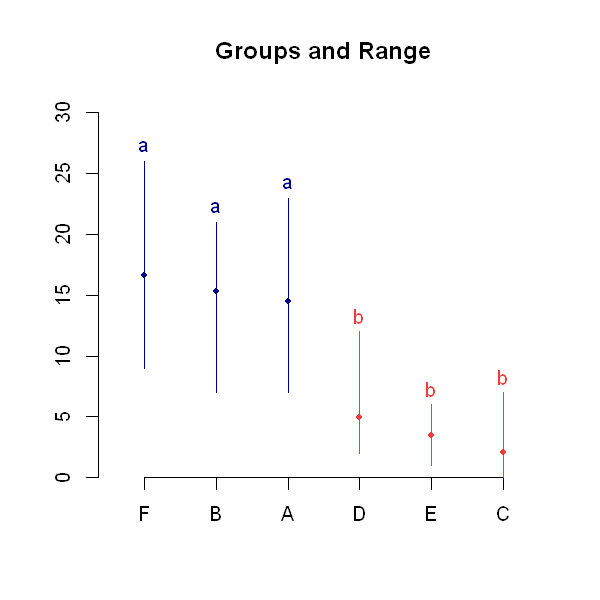

In [21]:
spray.LSD= LSD.test(result, "spray",p.adj="bonferroni", group=T)
spray.LSD
plot(spray.LSD) # 변동을 range로 나타낸 그래프 https://mansoostat.tistory.com/48

In [20]:
library(repr)
options(repr.plot.width=5 , repr.plot.height=5)

# 품종에 따라 꽃받침(sepal의 너비 차이를 알아보시오) 사후검정을수행하시오. Tukey 및LSD 테스트수행

The following objects are masked from iris (pos = 3):

    Petal.Length, Petal.Width, Sepal.Length, Sepal.Width, Species



  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

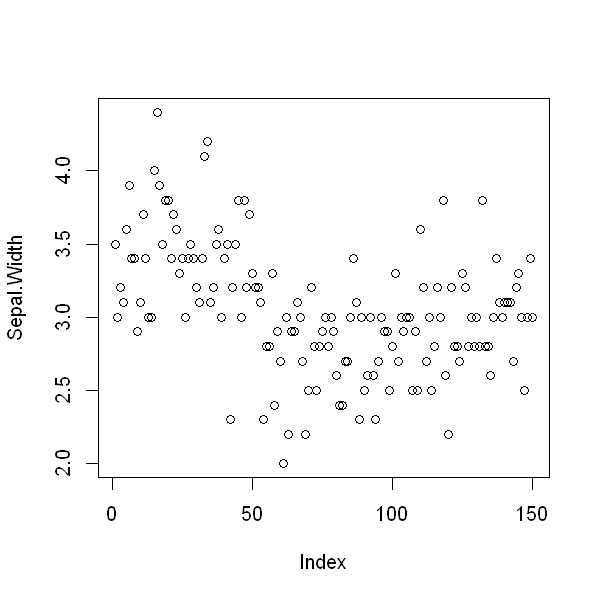

In [23]:
data(iris)
attach(iris)
summary(iris)
plot(Sepal.Width)

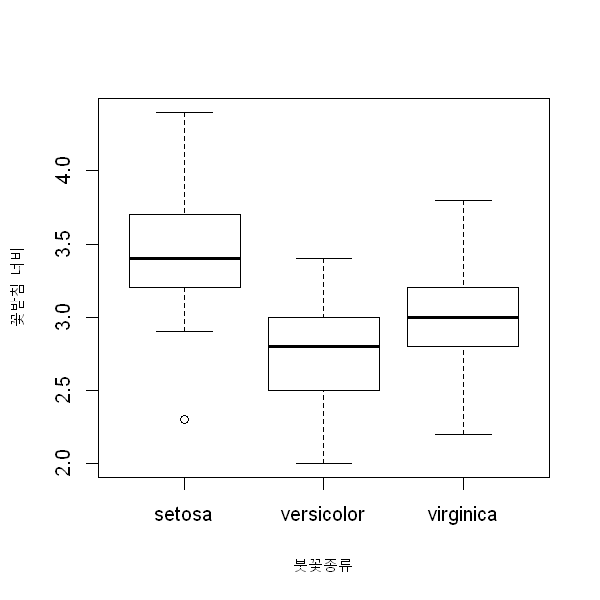

In [30]:
boxplot(Sepal.Width~Species, xlab = "붓꽃종류", ylab = "꽃받침 너비")


In [31]:
result = aov(Sepal.Width ~ Species, data = InsectSprays)
summary(result)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [33]:
#Compute Tukey Honest Significant Differences
TukeyHSD(result)# 고전적인 방법이여서 잘 쓰지 않는다. 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = InsectSprays)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


 adjusted p value가 <0.05이므로 3개 다 차이가 있다.

$statistics
    MSerror  Df     Mean       CV  t.value       MSD
  0.1153878 147 3.057333 11.11059 2.421686 0.1645234

$parameters
        test  p.ajusted  name.t ntr alpha
  Fisher-LSD bonferroni Species   3  0.05

$means
           Sepal.Width       std  r      LCL      UCL Min Max   Q25 Q50   Q75
setosa           3.428 0.3790644 50 3.333064 3.522936 2.3 4.4 3.200 3.4 3.675
versicolor       2.770 0.3137983 50 2.675064 2.864936 2.0 3.4 2.525 2.8 3.000
virginica        2.974 0.3224966 50 2.879064 3.068936 2.2 3.8 2.800 3.0 3.175

$comparison
NULL

$groups
           Sepal.Width groups
setosa           3.428      a
virginica        2.974      b
versicolor       2.770      c

attr(,"class")
[1] "group"

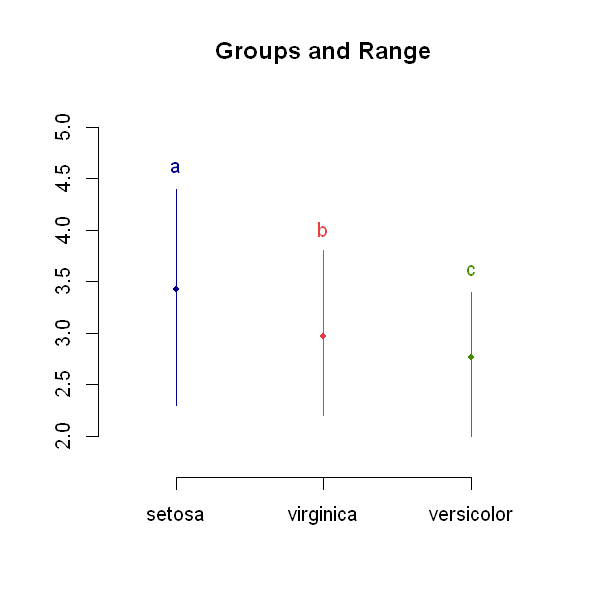

In [34]:
#Multiple comparisons, "Least significant difference" and Adjust P-values
Species.LSD= LSD.test(result, "Species",p.adj="bonferroni", group=T)
Species.LSD
plot(Species.LSD)

# 온도와 습도에 따른 바퀴벌레 성장

### 1. 데이터 입력

In [36]:
humidity = c(33,33,33,33,33,33,33,33,33 ,66,66,66,66,66,66,66,66,66 ,99,99,99,99,99,99,99,99,99)
temp = c(20,20,20 ,30,30,30 ,40,40,40 ,20,20,20 ,30,30,30 ,40,40,40 ,20,20,20 ,30,30,30 ,40,40,40)
cocks = c(1,2,3 ,5,6,7 ,9,10,11 ,9,10,11 ,13,14,15 ,17,18,19 ,17,18,19 ,21,22,23 ,25,26,27)
humidity = factor(humidity) # why factor? 범주형 변수로 바꾸어주어야하는데 
temp = factor(temp)
data = data.frame(temp = temp, humidity=humidity, cocks = cocks)
data

temp,humidity,cocks
20,33,1
20,33,2
20,33,3
30,33,5
30,33,6
30,33,7
40,33,9
40,33,10
40,33,11
20,66,9


### 2.데이터 탐색

In [53]:
install.packages("rlang")

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\envs\r\Lib\R\library\00LOCK\rlang\libs\i386\rlang.dll를 C:\ProgramData\Anaconda3\envs\r\Lib\R\library\rlang\libs\i386\rlang.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\k016k\AppData\Local\Temp\RtmpIXNNym\downloaded_packages


In [55]:
install.packages("doBy")

also installing the dependencies 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'lme4', 'pbkrtest', 'Deriv'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'Deriv' successfully unpacked and MD5 sums checked
package 'doBy' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\k016k\AppData\Local\Temp\RtmpIXNNym\downloaded_packages


In [57]:
require("doBy")

Loading required package: doBy
Warning message:
"package 'doBy' was built under R version 3.6.3"

humidity,temp,cocks.mean,cocks.sd,cocks.min,cocks.max
33,20,2,1,1,3
33,30,6,1,5,7
33,40,10,1,9,11
66,20,10,1,9,11
66,30,14,1,13,15
66,40,18,1,17,19
99,20,18,1,17,19
99,30,22,1,21,23
99,40,26,1,25,27


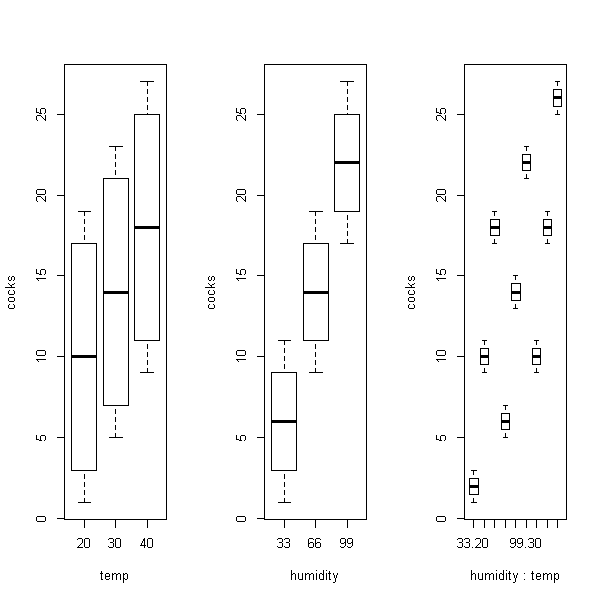

In [58]:
summaryBy(cocks~humidity*temp, data=data, FUN=c(mean,sd,min,max))

par(mfrow = c(1,3))                                                                 
boxplot(cocks ~ temp)                       
boxplot(cocks ~ humidity)                                                                                                                   
boxplot(cocks ~ humidity*temp)  

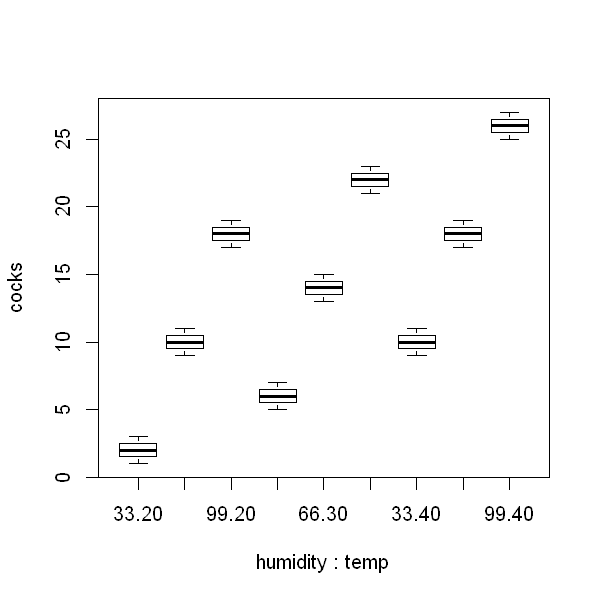

In [59]:
par(mfrow = c(1,1))                                                                 
boxplot(cocks ~ humidity*temp)  

### 3. 분산분석의 가정 성립 확인 

#### (1)분산분석의 가정 확인 - 정규성



	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.79624, p-value = 0.0001179


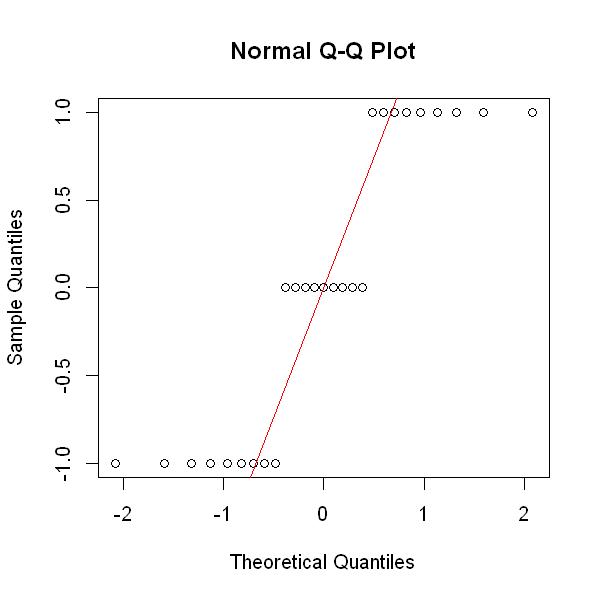

In [62]:
COCK = aov(cocks ~ humidity*temp, data=data)
aov_residuals = COCK$residuals
qqnorm(aov_residuals)
qqline(aov_residuals, col=2)
shapiro.test(x=aov_residuals) # p<0.05 정규성을 만족하지 않음.  
#-->--> 정규성을 만족하지 않고 2원이므로 프리드만 테스트를 진행해야함

#### (2)분산분석의 가정 확인 - 등분산성

In [65]:
install.packages("car")
require("car")
leveneTest(cocks ~ humidity*temp) # p = 1>0.05이므로 모든 집단의 분산이 동일하다.(등분산성만족)

Loading required package: car
Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

,Df,F value,Pr(>F)
group,8,9.419037e-33,1
,18,NA,NA


### 4. 데이터 분석


              Df Sum Sq Mean Sq F value   Pr(>F)    
humidity       2   1152     576     576  < 2e-16 ***
temp           2    288     144     144 8.43e-12 ***
humidity:temp  4      0       0       0        1    
Residuals     18     18       1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = cocks ~ humidity * temp, data = data)

Terms:
                humidity temp humidity:temp Residuals
Sum of Squares      1152  288             0        18
Deg. of Freedom        2    2             4        18

Residual standard error: 1
Estimated effects may be unbalanced

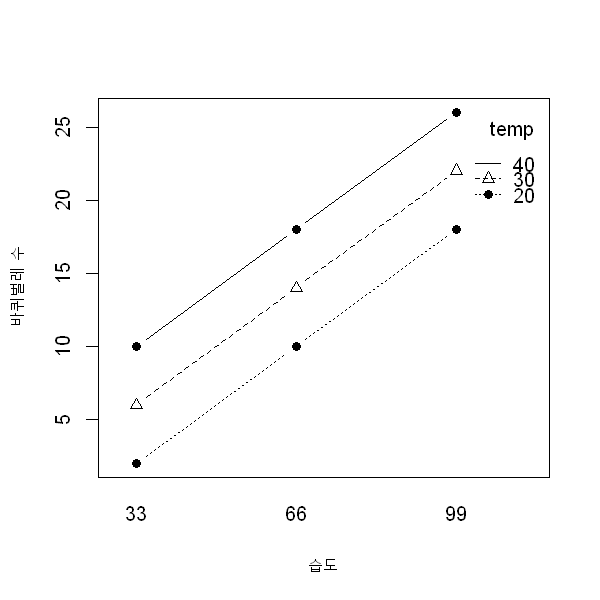

In [66]:
COCK = aov(cocks ~ humidity*temp, data=data)
summary(COCK)
COCK
interaction.plot(x.factor = humidity,    trace.factor=temp,    response = cocks,
                 xlab = "습도", ylab="바퀴벌레 수",type ="b", pch=c(19,24))

# interaction.plot(
#   x.factor,      # X 축에 그릴 팩터
#   trace.factor,  # 자취를 그릴 레벨을 저장한 팩터
#   response       # 반응값을 저장한 숫자 벡터
# )


#### 사후검정

In [126]:
#사후검정
require(agricolae)                                                                                                                  
COCK.LSD = LSD.test(COCK, c("humidity"), main = "COCK ~ humidity", p.adj = "fdr", group =T)
COCK.LSD

$statistics
  MSerror Df Mean       CV  t.value       MSD
        1 18   14 7.142857 2.100922 0.9903841

$parameters
        test p.ajusted   name.t ntr alpha
  Fisher-LSD       fdr humidity   3  0.05

$means
   cocks      std r       LCL       UCL Min Max Q25 Q50 Q75
33     6 3.570714 9  5.299693  6.700307   1  11   3   6   9
66    14 3.570714 9 13.299693 14.700307   9  19  11  14  17
99    22 3.570714 9 21.299693 22.700307  17  27  19  22  25

$comparison
NULL

$groups
   cocks groups
99    22      a
66    14      b
33     6      c

attr(,"class")
[1] "group"

In [127]:
#사후검정
require(agricolae)                                                                                                                  
COCK.LSD = LSD.test(COCK, c("temp"), main = "COCK ~ humidity", p.adj = "fdr", group =T)
COCK.LSD

$statistics
  MSerror Df Mean       CV  t.value       MSD
        1 18   14 7.142857 2.100922 0.9903841

$parameters
        test p.ajusted name.t ntr alpha
  Fisher-LSD       fdr   temp   3  0.05

$means
   cocks     std r       LCL      UCL Min Max Q25 Q50 Q75
20    10 6.98212 9  9.299693 10.70031   1  19   3  10  17
30    14 6.98212 9 13.299693 14.70031   5  23   7  14  21
40    18 6.98212 9 17.299693 18.70031   9  27  11  18  25

$comparison
NULL

$groups
   cocks groups
40    18      a
30    14      b
20    10      c

attr(,"class")
[1] "group"

In [67]:
#사후검정
require(agricolae)                                                                                                                  
COCK.LSD = LSD.test(COCK, c("humidity", "temp"), main = "COCK ~ humidity*temp", p.adj = "fdr", group =T)
COCK.LSD

$statistics
  MSerror Df Mean       CV  t.value      MSD
        1 18   14 7.142857 2.100922 1.715396

$parameters
        test p.ajusted        name.t ntr alpha
  Fisher-LSD       fdr humidity:temp   9  0.05

$means
      cocks std r        LCL       UCL Min Max  Q25 Q50  Q75
33:20     2   1 3  0.7870321  3.212968   1   3  1.5   2  2.5
33:30     6   1 3  4.7870321  7.212968   5   7  5.5   6  6.5
33:40    10   1 3  8.7870321 11.212968   9  11  9.5  10 10.5
66:20    10   1 3  8.7870321 11.212968   9  11  9.5  10 10.5
66:30    14   1 3 12.7870321 15.212968  13  15 13.5  14 14.5
66:40    18   1 3 16.7870321 19.212968  17  19 17.5  18 18.5
99:20    18   1 3 16.7870321 19.212968  17  19 17.5  18 18.5
99:30    22   1 3 20.7870321 23.212968  21  23 21.5  22 22.5
99:40    26   1 3 24.7870321 27.212968  25  27 25.5  26 26.5

$comparison
NULL

$groups
      cocks groups
99:40    26      a
99:30    22      b
66:40    18      c
99:20    18      c
66:30    14      d
33:40    10      e
66:20    10  

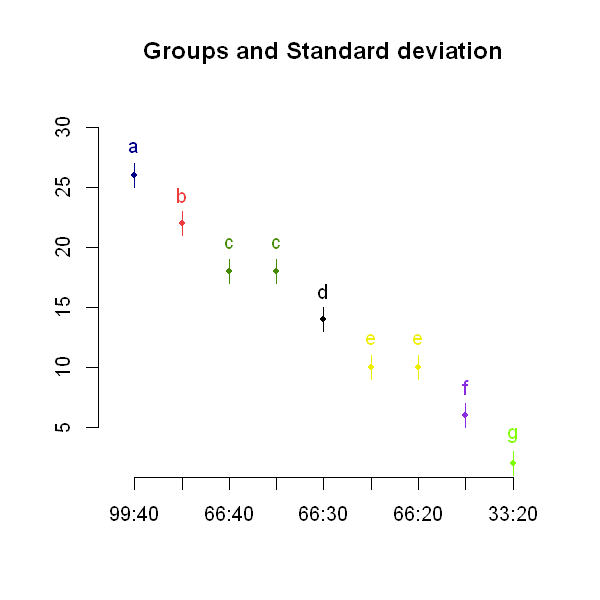

In [68]:
plot(COCK.LSD, variation="SD")


### 분산분석 수행(습도(22,66,99)에 따른 바퀴벌레 수에 차이가 있는지 )

In [37]:
COCK = aov(cocks ~ humidity, data = data)
COCK

Call:
   aov(formula = cocks ~ humidity, data = data)

Terms:
                humidity Residuals
Sum of Squares      1152       306
Deg. of Freedom        2        24

Residual standard error: 3.570714
Estimated effects may be unbalanced

In [38]:
summary(COCK)
#r은 temp범주의 개수 20,30,40으로 3 따라서 자유도는 3-1=2
#n은 sample의 개수 따라서 27 자유도는 27-3=24

            Df Sum Sq Mean Sq F value  Pr(>F)    
humidity     2   1152   576.0   45.18 7.3e-09 ***
Residuals   24    306    12.8                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

p-value <0.0.5이므로 습도에 따른 차이가 있다. 

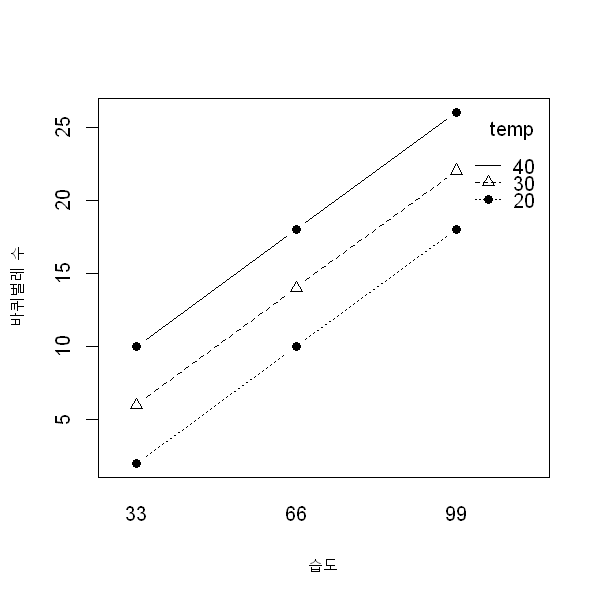

In [46]:
#그룹 내 모형. 
interaction.plot(x.factor=humidity, 
                 trace.factor=temp,
                 response=cocks,
                 xlab= "습도", 
                 ylab= "바퀴벌레 수", 
                 type = "b", 
                 pch=c(19,2))

In [39]:
m_20 = (1+2+3+9+10+11+17+18+19)/9 #--> 온도 20인 집단 의 평균
m_30 = (5+6+7+13+14+15+21+22+23)/9 # --> 온도 30인 집단의 평균
m_40 = (9+10+11+17+18+19+25+26+27)/9 # --> 온도 40인 집단
m = mean(cocks) #--> 전체 평균

In [42]:
m

[1] 14

In [43]:
#1.within group(error) sum of squares is
data_t_20 = data[data$temp ==20,]
m_20 = mean(data_t_20$cocks)
sum( (data_t_20$cocks - m_20)^2 )

data_t_30 = data[data$temp ==30,]
m_30 = mean(data_t_30$cocks)
sum( (data_t_30$cocks - m_30)^2 )

data_t_40 = data[data$temp ==40,]
m_40 = mean(data_t_40$cocks)
sum( (data_t_40$cocks - m_40)^2 )

[1] 390

[1] 390

[1] 390

In [44]:
#2. the total among group(treatment +error) sum of squares is the sum of the average
#    displacement of each treatment, squared and multiplied by the sample size of each treatment  ////
(m_20 - m)^2 * 9 
(m_30 - m)^2 * 9
(m_40 - m)^2 * 9

[1] 144

[1] 0

[1] 144

In [45]:
#4 The total sum of squares is : 
sum( (cocks - m)^2 ) - 288

[1] 1170

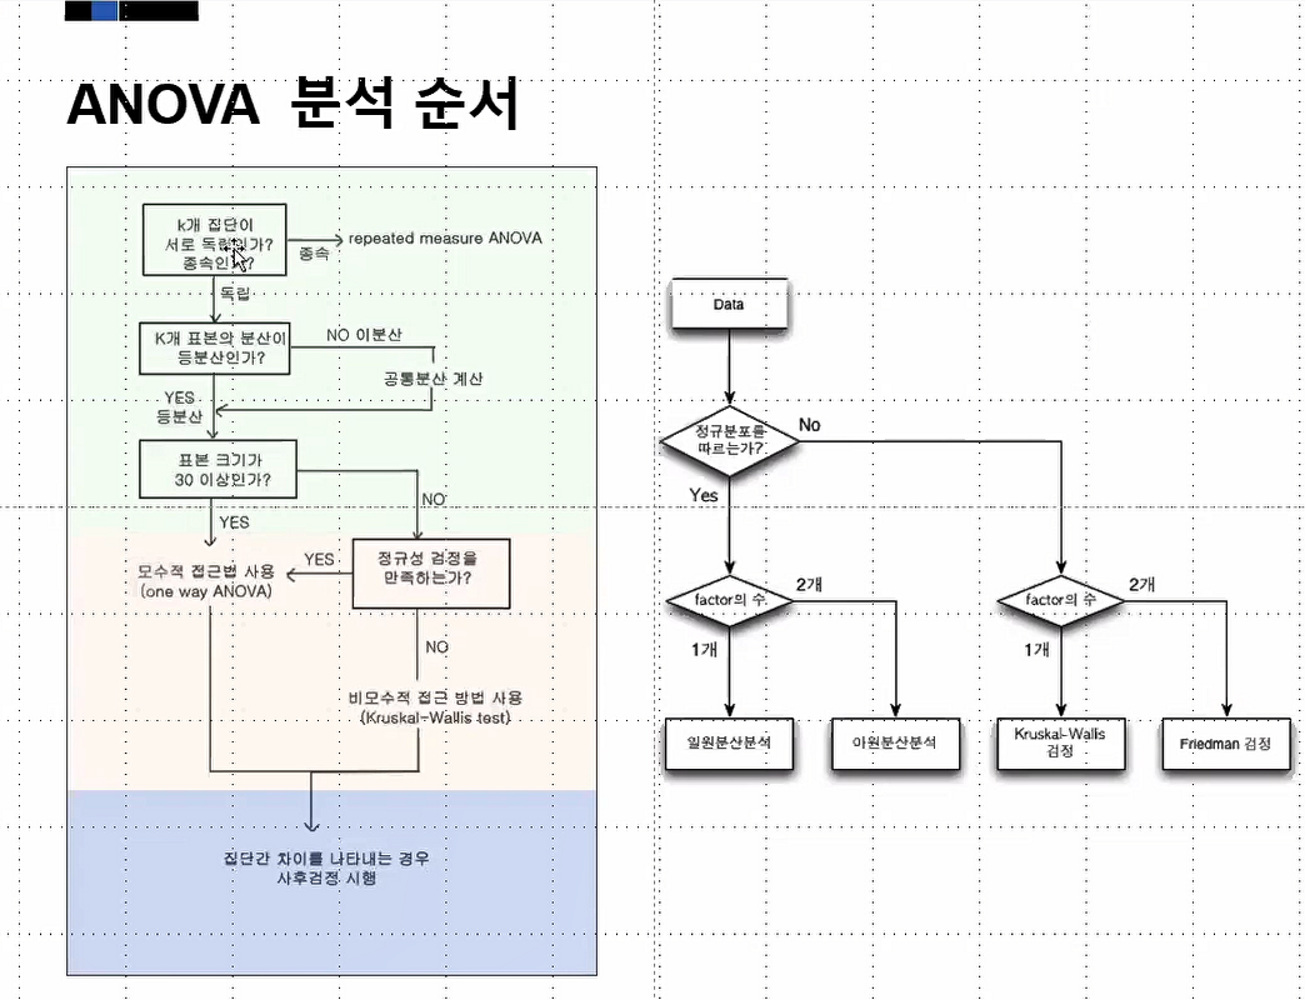

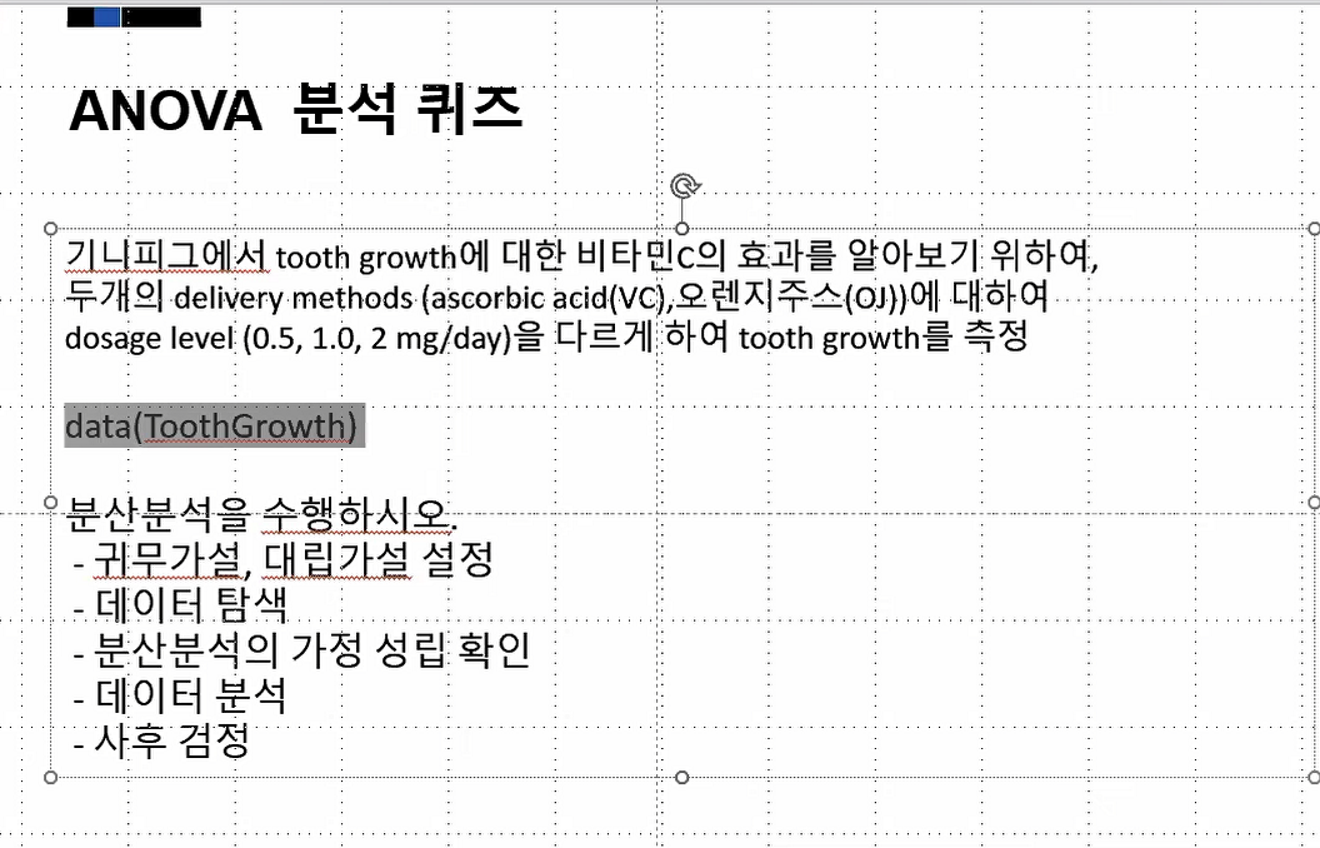

귀무가설 대립가설 설정
데이터 탐색
분산분석의 가정 성립 확인
데이터 분석
사후 검정

In [77]:
#1.데이터 입력
data(ToothGrowth)
attach(ToothGrowth)
str(ToothGrowth)
len = len
supp = supp
dose = factor(dose)
data = data.frame(len = len, supp=supp, dose = dose)
str(data)

The following objects are masked _by_ .GlobalEnv:

    dose, len, supp

The following objects are masked from ToothGrowth (pos = 3):

    dose, len, supp



'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: Factor w/ 3 levels "0.5","1","2": 1 1 1 1 1 1 1 1 1 1 ...


supp,dose,len.mean,len.sd,len.min,len.max
OJ,0.5,13.23,4.459709,8.2,21.5
OJ,1,22.70,3.910953,14.5,27.3
OJ,2,26.06,2.655058,22.4,30.9
VC,0.5,7.98,2.746634,4.2,11.5
VC,1,16.77,2.515309,13.6,22.5
VC,2,26.14,4.797731,18.5,33.9


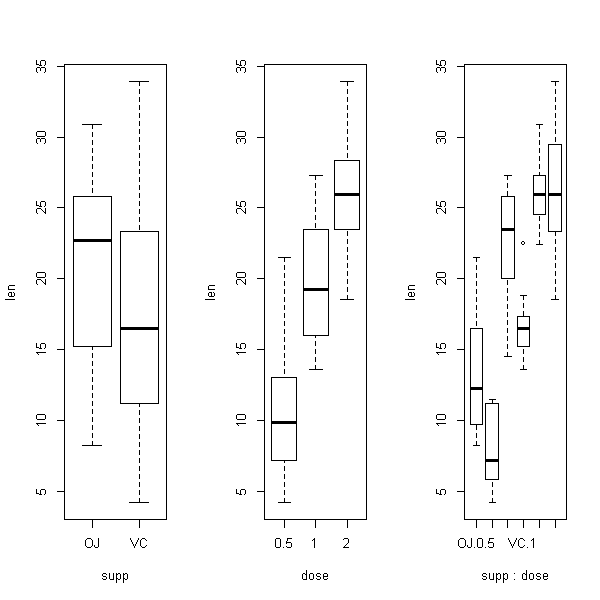

In [70]:
# 2.데이터 탐색
require("doBy")

summaryBy(len~supp*dose, data=data, FUN=c(mean,sd,min,max))

par(mfrow = c(1,3))                                                                 
boxplot(len ~ supp)                       
boxplot(len ~ dose)                                                                                                                   
boxplot(len ~ supp*dose)    


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.98499, p-value = 0.6694


,Df,F value,Pr(>F)
group,5,1.708578,0.1483606
,54,NA,NA


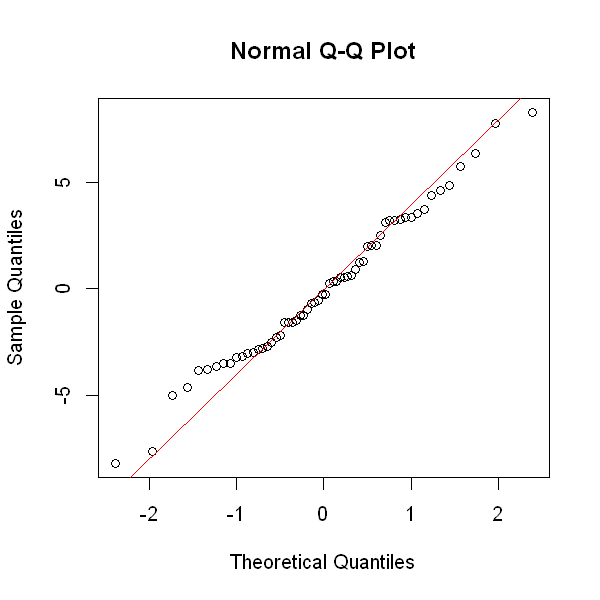

In [71]:
#3. 분산분석의 가정 성립 확인
#분산분석의 가정 확인 - 정규성
par(mfrow = c(1,1))                                                                 
LEN = aov(len ~ supp*dose, data=data)
aov_residuals = LEN$residuals
qqnorm(aov_residuals)
qqline(aov_residuals, col=2)
shapiro.test(x=aov_residuals) # p>0.05 정규성을 만족함 
#분산분석의 가정 확인 - 등분산성
require("car")
leveneTest(len ~ supp*dose) # p>0.05이므로 모든 집단의 분산이 동일하다.(등분산성만족)


            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Call:
   aov(formula = len ~ supp * dose, data = data)

Terms:
                    supp     dose supp:dose Residuals
Sum of Squares   205.350 2426.434   108.319   712.106
Deg. of Freedom        1        2         2        54

Residual standard error: 3.631411
Estimated effects may be unbalanced

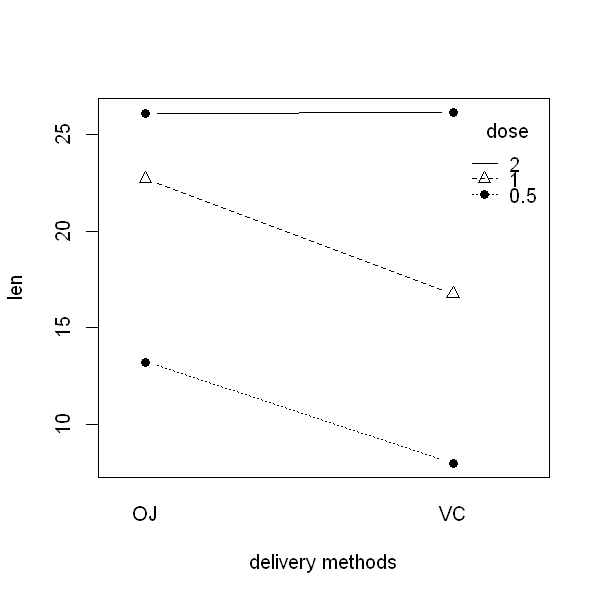

In [74]:
#4. 데이터 분석
LEN = aov(len ~ supp*dose, data=data)
summary(LEN)
LEN
interaction.plot(x.factor = supp,    trace.factor=dose,    response = len,
                 xlab = "delivery methods", ylab="len",type ="b", pch=c(19,24))



Call:
   aov(formula = len ~ supp, data = data)

Terms:
                    supp Residuals
Sum of Squares   205.350  3246.859
Deg. of Freedom        1        58

Residual standard error: 7.482001
Estimated effects may be unbalanced

Call:
   aov(formula = len ~ dose, data = data)

Terms:
                    dose Residuals
Sum of Squares  2426.434  1025.775
Deg. of Freedom        2        57

Residual standard error: 4.242175
Estimated effects may be unbalanced

Call:
   aov(formula = len ~ supp * dose, data = data)

Terms:
                    supp     dose supp:dose Residuals
Sum of Squares   205.350 2426.434   108.319   712.106
Deg. of Freedom        1        2         2        54

Residual standard error: 3.631411
Estimated effects may be unbalanced

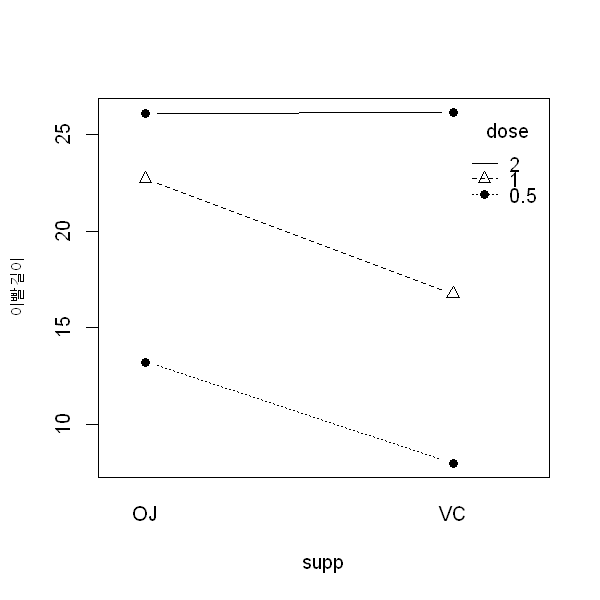

In [75]:

LEN = aov(len ~ supp, data= data)
LEN
LEN = aov(len ~ dose, data= data)
LEN
LEN = aov(len ~ supp*dose, data= data)
LEN

interaction.plot(x.factor=supp, 
                 trace.factor=dose,
                 response=len,
                 xlab= "supp", 
                 ylab= "이빨길이", 
                 type = "b", 
                 pch=c(19,2))

$statistics
   MSerror Df     Mean       CV  t.value      MSD
  13.18715 54 18.81333 19.30233 2.004879 3.255957

$parameters
        test p.ajusted    name.t ntr alpha
  Fisher-LSD       fdr supp:dose   6  0.05

$means
         len      std  r       LCL      UCL  Min  Max    Q25   Q50    Q75
OJ:0.5 13.23 4.459709 10 10.927691 15.53231  8.2 21.5  9.700 12.25 16.175
OJ:1   22.70 3.910953 10 20.397691 25.00231 14.5 27.3 20.300 23.45 25.650
OJ:2   26.06 2.655058 10 23.757691 28.36231 22.4 30.9 24.575 25.95 27.075
VC:0.5  7.98 2.746634 10  5.677691 10.28231  4.2 11.5  5.950  7.15 10.900
VC:1   16.77 2.515309 10 14.467691 19.07231 13.6 22.5 15.275 16.50 17.300
VC:2   26.14 4.797731 10 23.837691 28.44231 18.5 33.9 23.375 25.95 28.800

$comparison
NULL

$groups
         len groups
VC:2   26.14      a
OJ:2   26.06      a
OJ:1   22.70      b
VC:1   16.77      c
OJ:0.5 13.23      d
VC:0.5  7.98      e

attr(,"class")
[1] "group"

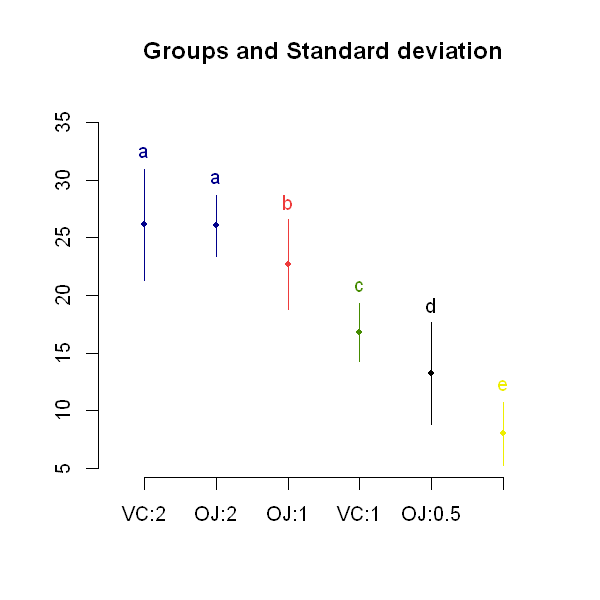

In [76]:
require(agricolae)                                                                                                                  
LEN.LSD = LSD.test(LEN, c("supp", "dose"), main = "LEN ~ supp*dose", p.adj = "fdr", group =T)
LEN.LSD
plot(LEN.LSD, variation="SD")

#독립은 데이터 타입을 보고 알 수 있다. 이 데이터는 다른 기니피그를 활용한 것이기 때문에 데이터는 독립이다. 


#독립성을 만족하지 않을때는 반복측정분산분석을 하면 되고 
#정규성을 만족하지 않을때는 비모수적 test를 하면 되고 -->이게 무슨 차이지?
#등분산성을 만족하지 않을때는 공통분산을 구하면 된다.

#지금은 연속형 자료인데.. 이산형 자료를 다루는 카이스트테스트? 도 이러한 절차를 따른다.(크게 다르지 않다. )

# 등분산성과 정규성을 만족하지 않는 데이터 예제 , shaprio test와 leventest로 검정해보자


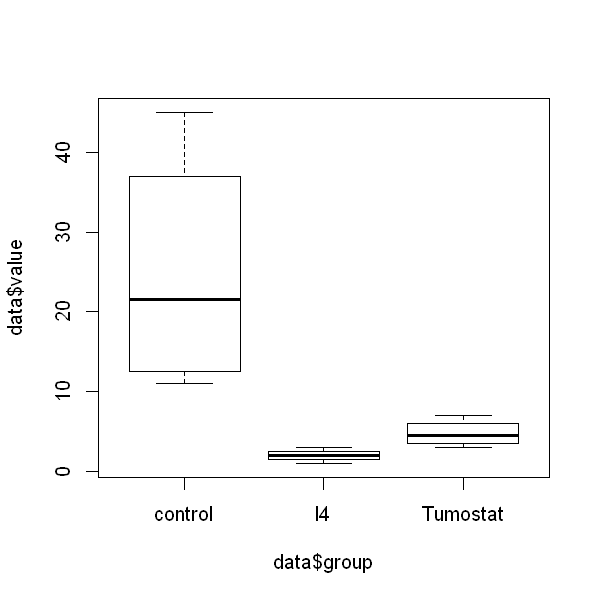

In [78]:
group = c("control","control","control","control","Tumostat","Tumostat","Tumostat","Tumostat","l4","l4","l4","l4")
value=c(45,29,14,11,7,5,4,3,3,2,2,1)
data = data.frame(group=factor(group), value=value)
boxplot(data$value~data$group)

group,value.mean,value.sd,value.min,value.max
control,24.75,15.6284996,11,45
l4,2.00,0.8164966,1,3
Tumostat,4.75,1.7078251,3,7



	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.83724, p-value = 0.02563


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."

,Df,F value,Pr(>F)
group,2,8.726891,0.007814413
,9,NA,NA


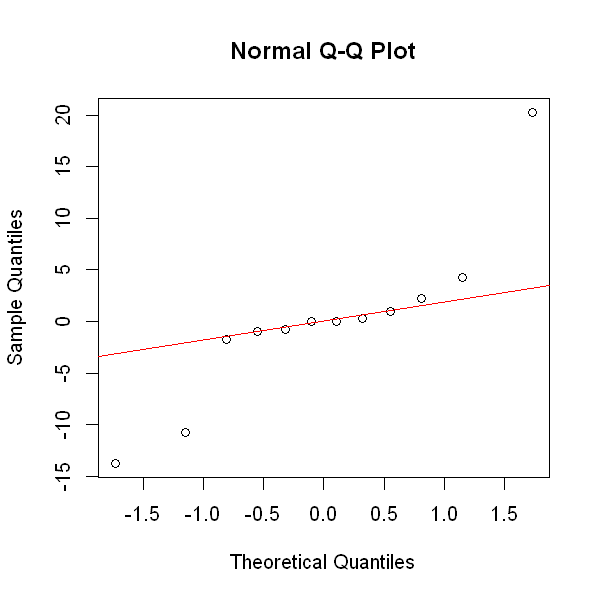

In [79]:
require("doBy")
summaryBy(value~group, data=data, FUN=c(mean,sd,min,max))
data_aov = aov(value~group, data=data)
aov_residuals = data_aov$residuals
qqnorm(aov_residuals)
qqline(aov_residuals, col=2)
shapiro.test(x=aov_residuals) # p-value = 0.02563 <0.05 이므로 정규분포를 따르지 않는다.
require("car")
leveneTest(value ~ group ) #p-value=0.007814 < 0.05 등분산성을 만족하지 않는다. 

### 변환을 한번 해보자. 첫번째 그룹 control 그룹이 너무 튄다.
value에다가 log를 씌워주면

group,value.mean,value.sd,value.min,value.max
control,3.0527277,0.6499486,2.397895,3.806662
l4,0.6212267,0.4561304,0.000000,1.098612
Tumostat,1.5100637,0.3579797,1.098612,1.945910



	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.95177, p-value = 0.663


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."

,Df,F value,Pr(>F)
group,2,1.440301,0.2866277
,9,NA,NA


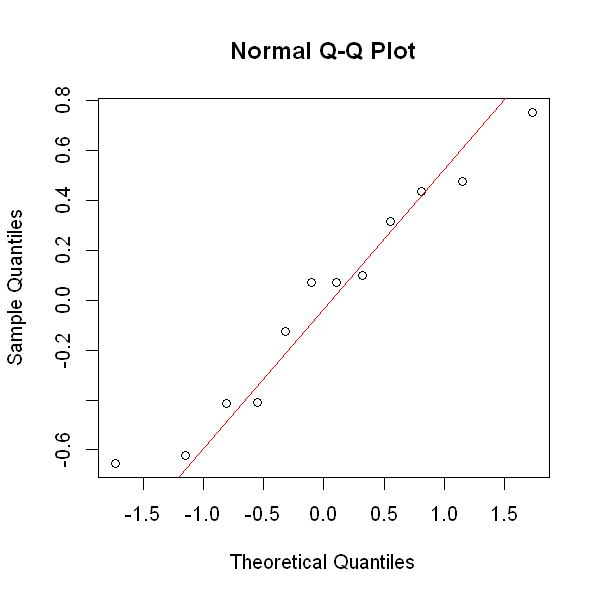

In [80]:
value  = log(value)
data = data.frame(group=factor(group), value=value)
summaryBy(value~group, data=data, FUN=c(mean,sd,min,max))
data_aov = aov(value~group, data=data)
aov_residuals = data_aov$residuals
qqnorm(aov_residuals)
qqline(aov_residuals, col=2)
shapiro.test(x=aov_residuals) # p-value = 0.663 > 0.05 이므로 정규성 만족
leveneTest(value ~ group ) #p-value=0.2866 > 0.05 등분산성 만족

# 통계학 퀴즈 결과 차이 검정(독립성x 정규성o 등분산성o)
RMANOVA --> paired t test 는 비교할 그룹이 2개일때. 3개일때는 RMANOVA --> ezANOVA()랑 같은건가? 반복측정 분산 분석 독립성은 없지만. 정규성, 등분산성 있을때

'data.frame':	80 obs. of  3 variables:
 $ Student: int  1 2 3 4 5 6 7 8 9 10 ...
 $ score  : num  30 37 29 30 35 28 42 31 40 36 ...
 $ type   : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...


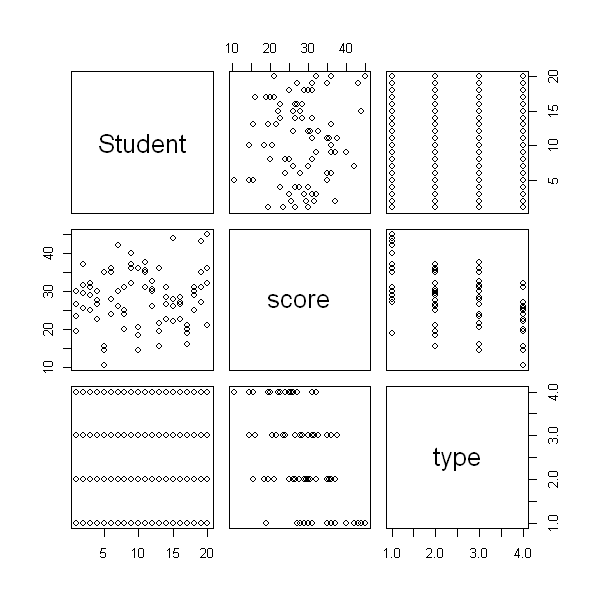

In [84]:
setwd("C:\\Users\\k016k\\OneDrive\\바탕 화면\\창헌폴더\\2020.1학기\\실험통계학 및 실습\\실습데이터")
data = read.table("OneWayRMANOVA.txt", header=T, sep='\t')
data$type = factor(data$type)
str(data)
plot(data) #--> 그래프를 자유자재로 그릴 수는 없는가.

In [87]:
s_l_test = function(data)
  {
    summaryBy(dv~iv, data=data, FUN=c(mean,sd,min,max))
    data_aov = aov(dv~iv, data=data)
    aov_residuals = data_aov$residuals
    qqnorm(aov_residuals)
    qqline(aov_residuals, col=2)
    shapiro.test(x=aov_residuals) 
    leveneTest(dv ~ iv ) 
  }

dv.mean,dv.sd,dv.min,dv.max
28.15,7.208645,10.5,45


[1] "정규성테스트 shapiro.test결과"



	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.97536, p-value = 0.1247


[1] "등분산성 테스트 leventest결과 shapiro.test결과"


,Df,F value,Pr(>F)
group,3,0.3519496,0.7878417
,76,NA,NA


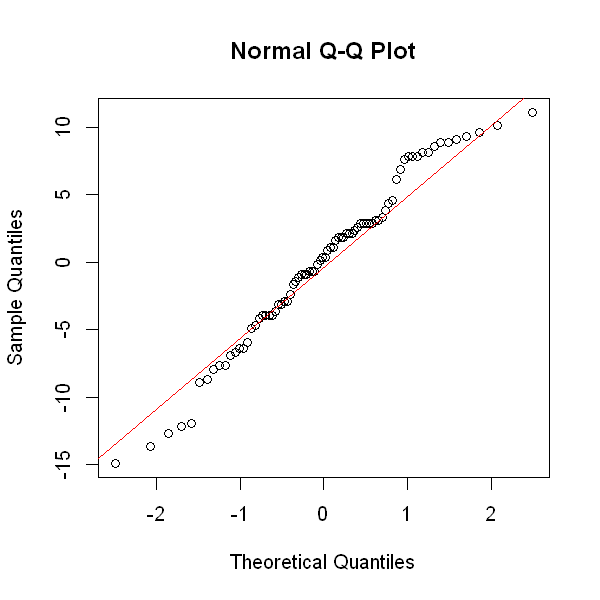

In [90]:
data = data
iv = data$type #독립변수
dv = data$score# 종속변수
summaryBy(dv~iv, data=data, FUN=c(mean,sd,min,max))
data_aov = aov(dv~iv, data=data)
aov_residuals = data_aov$residuals
qqnorm(aov_residuals)
qqline(aov_residuals, col=2)
print("정규성테스트 shapiro.test결과")
shapiro.test(x=aov_residuals) 
print("등분산성 테스트 leventest결과 ")
leveneTest(dv ~ iv ) 
#둘다 p-vluae가 >0.05이므로 정규성 등분산성 만족 그렇다면 독립성 테스트는 어떻게 하는가? chisq.test() 근데 여기서는 일단 딱 봐도 독립적이지 않다. 
# 왜나하면 한 학생의 1,2,3,4차 의 시험점수는 서로 독립적일 수가 없다(당연하지?). 


### 반복측정 분산 분석( 독립성은 없지만. 정규성, 등분산성 있을때)

In [91]:
summaryBy(score~type, data=data, FUN=c(mean,sd,min,max))
RM= aov(score ~ type + Error(Student/type), data=data)
summary(RM)

type,score.mean,score.sd,score.min,score.max
1,33.90,6.640387,19.0,45.0
2,27.40,6.109957,15.5,37.0
3,28.15,6.464681,14.5,37.5
4,23.15,5.579804,10.5,32.0



Error: Student
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  1   26.5    26.5               

Error: Student:type
     Df Sum Sq Mean Sq
type  3  910.1   303.4

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)  
type       3  309.7  103.23     2.6 0.0587 .
Residuals 72 2858.9   39.71                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
install.packages("broom")
install.packages("nlme")
require(nlme)
install.packages("multcomp")
require(multcomp)

### 이게 좀 어려웡

,numDF,denDF,F-value,p-value
(Intercept),1,57,647.50146,0.000000e+00
type,3,57,20.77156,3.218974e-09



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lme.formula(fixed = score ~ type, data = data, random = ~1 | 
    Student/type)

Linear Hypotheses:
           Estimate Std. Error z value Pr(>|z|)    
2 - 1 == 0   -6.500      1.372  -4.739  < 0.001 ***
3 - 1 == 0   -5.750      1.372  -4.192  < 0.001 ***
4 - 1 == 0  -10.750      1.372  -7.837  < 0.001 ***
3 - 2 == 0    0.750      1.372   0.547  0.94745    
4 - 2 == 0   -4.250      1.372  -3.098  0.01048 *  
4 - 3 == 0   -5.000      1.372  -3.645  0.00152 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


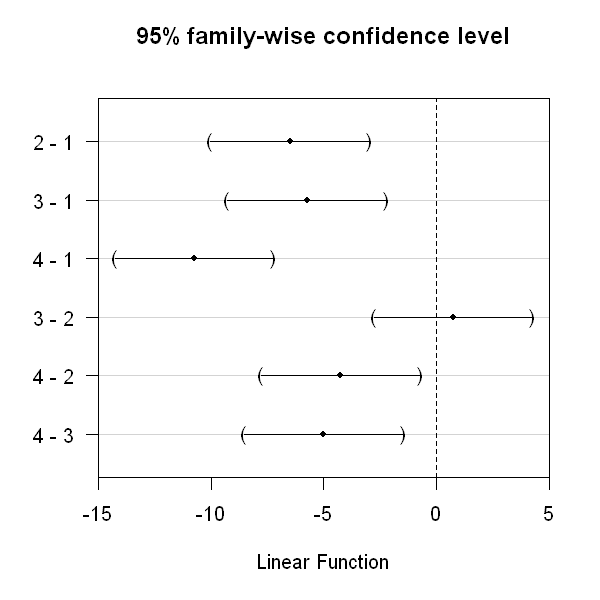

In [95]:
RM_lme=lme(score~type, random = ~1|Student/type, data=data)
anova(RM_lme)
summary(glht(RM_lme, linfct=mcp(type="Tukey")))
plot(glht(RM_lme, linfct=mcp(type="Tukey")))

# 비모수 검정 - Kruskall-vallis test
#독립성o 정규성x 등분산성N/A
일원부산분석의 비모수적 방법으로는 크루스칼 왈리스 검정이 있음
세개 그룹이 모두 각각 정규성을 만족하지 않는 경우 평균 비교를 통해 그룹의 차이를 비교할 수 없다.(평균 비교는 정규분포를 가정해야하기 때문)

방법 
1. 모든 자료를 모아 크기 순으로 정렬
2. 가장 작은 값부터 순위를 매겨 그룹별 순위 합을 구함
3. 크기의 차이가 없는 집단이라면 순위 합도 비슷할 것임
4. 그룹간 차이가 많이 난다면 순위 합도 차이가 나는 것을 이용한 검정법

In [96]:
group = c ("C","C","C","C", "N","N","N","N", "M","M","M","M")
brain = c (8,8,11,11,8,7,5,4,5,4,2,1)
data = data.frame(group=group,brain=brain)
#맨 처음에 해던 데이터는 정규성과 등분산성을 만족하기 때문에 따로 검정 안함.

In [97]:
group

[1] "C" "C" "C" "C" "N" "N" "N" "N" "M" "M" "M" "M"

In [98]:
brain

[1]  8  8 11 11  8  7  5  4  5  4  2  1

In [99]:
install.packages("nparcomp")
require(nparcomp)
iv = group
dv = brain

package 'nparcomp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\k016k\AppData\Local\Temp\RtmpIXNNym\downloaded_packages


Loading required package: nparcomp
Warning message:
"package 'nparcomp' was built under R version 3.6.3"

In [100]:
kruskal.test(brain ~ group, data=data)#적어도 한 그룹이 다르다.


	Kruskal-Wallis rank sum test

data:  brain by group
Kruskal-Wallis chi-squared = 8.319, df = 2, p-value = 0.01562


In [101]:
m_result = mctp(brain~group, data=data)# 사후검정


 #----------------Nonparametric Multiple Comparisons for relative effects---------------# 
 
 - Alternative Hypothesis:  True differences of relative effects are not equal to 0 
 - Estimation Method:  Global Pseudo Ranks 
 - Type of Contrast : Tukey 
 - Confidence Level: 95 % 
 - Method = Fisher with 5 DF 
 
 #--------------------------------------------------------------------------------------# 
 


In [102]:
summary(m_result)


 #----------------Nonparametric Multiple Comparisons for relative effects---------------# 
 
 - Alternative Hypothesis:  True differences of relative effects are not equal to 0 
 - Estimation Method: Global Pseudo ranks 
 - Type of Contrast : Tukey 
 - Confidence Level: 95 % 
 - Method = Fisher with 5 DF 
 
 #--------------------------------------------------------------------------------------# 
 
 #----Data Info-------------------------------------------------------------------------# 
  Sample Size    Effect     Lower     Upper
1      C    4 0.8125000 0.7696971 0.8489093
2      M    4 0.2083333 0.1479787 0.2850681
3      N    4 0.4791667 0.3922383 0.5673752

 #----Contrast--------------------------------------------------------------------------# 
       1  2 3
2 - 1 -1  1 0
3 - 1 -1  0 1
3 - 2  0 -1 1

 #----Analysis--------------------------------------------------------------------------# 
      Estimator  Lower  Upper Statistic      p.Value
2 - 1    -0.604 -0.719 -0.457   -10.6

# 비모수 검정 - Friedman test
정규성 x

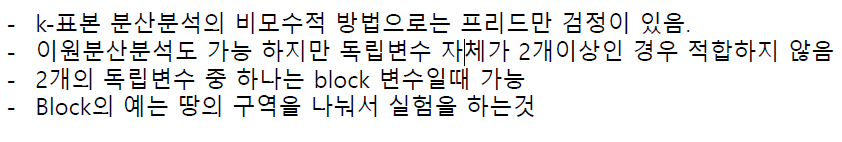

In [ ]:
install.packages("PMCMR")
install.packages("multcompView")
install.packages("rcompanion")
library(rcompanion)
library(multcompView)
require(PMCMR)

In [ ]:
왜 이 데이터를 프리드만 검정을 한 거지? --> 그냥 예시를 들기 위해서 했다. 

In [107]:
setwd("C:\\Users\\k016k\\OneDrive\\바탕 화면\\창헌폴더\\2020.1학기\\실험통계학 및 실습\\실습데이터")
data = read.table("OneWayRMANOVA.txt", header=T, sep='\t')
str(data)
data$type = factor(data$type)


'data.frame':	80 obs. of  3 variables:
 $ Student: int  1 2 3 4 5 6 7 8 9 10 ...
 $ score  : num  30 37 29 30 35 28 42 31 40 36 ...
 $ type   : int  1 1 1 1 1 1 1 1 1 1 ...


### 프리드만 검정

In [114]:
friedman.test(data$score, data$type, data$Student)
Post = posthoc.friedman.nemenyi.test(data$score, data$type, data$Student)  # p-value = 3.174e-07 < 0.05 로 유의미한 차이가 있음
Post
pTable = Post$p.value
pTableComplete = fullPTable(pTable)
multcompLetters(pTableComplete)


	Friedman rank sum test

data:  data$score, data$type and data$Student
Friedman chi-squared = 33.03, df = 3, p-value = 3.174e-07



	Pairwise comparisons using Nemenyi multiple comparison test	
             with q approximation for unreplicated blocked data 

data:  data$score , data$type and data$Student 

  1       2      3     
2 0.2850  -      -     
3 0.4189  0.9948 -     
4 2.1e-07 0.0011 0.0004

P value adjustment method: none 

  1   2   3   4 
"a" "a" "a" "b" 

In [111]:
Post = posthoc.friedman.conover.test(data$score, data$type, data$Student, p.adjust = "bonferroni")

In [112]:
Post


	Pairwise comparisons using Conover's test for a two-way	
                    balanced complete block design 

data:  data$score , data$type and data$Student 

  1       2       3      
2 1.9e-05 -       -      
3 0.00024 1.00000 -      
4 < 2e-16 1.0e-14 8.4e-16

P value adjustment method: bonferroni 

In [115]:
pTable = Post$p.value
pTableComplete = fullPTable(pTable)
multcompLetters(pTableComplete)

  1   2   3   4 
"a" "a" "a" "b" 

# 비모수 검정 - Ranked Transformed ANOVA

1. 정규성 가정을 만족시키지 못할 때 이원 이상의 분산분석에서 적용가능
2. 반복 측정 분산 분석도 수행 가능

In [ ]:
install.packages("ARTool")
install.packages("ART")
require(ARTool)
require(ART)

In [117]:
humidity = c(33,33,33,33,33,33,33,33,33,66,66,66,66,66,66,66,66,66,99,99,99,99,99,99,99,99,99)
temp = c(20,20,20,30,30,30,40,40,40,20,20,20,30,30,30,40,40,40,20,20,20,30,30,30,40,40,40)
cocks = c(1,2,3,5,6,7,9,10,11,9,10,11,13,14,15,17,18,19,17,18,19,21,22,23,25,26,27)

humidity = factor(humidity)
temp = factor(temp)
data=data.frame(temp=temp,humidity=humidity,cocks=cocks)

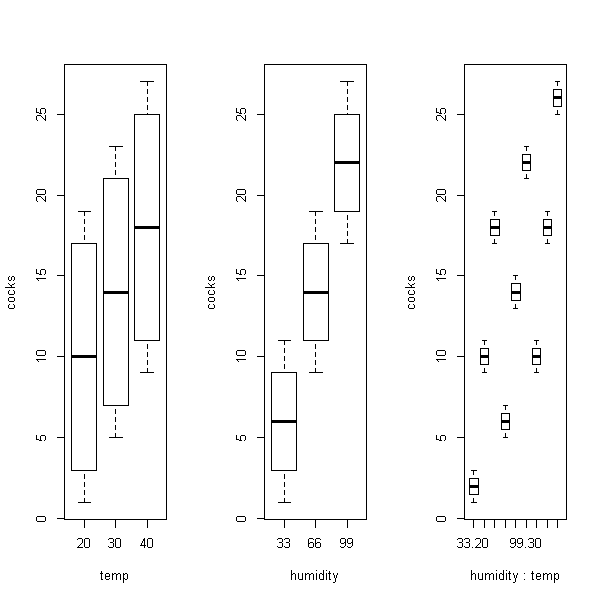

In [124]:
par(mfrow = c(1,3))                                                                 
boxplot(cocks ~ temp)                       
boxplot(cocks ~ humidity)                                                                                                                   
boxplot(cocks ~ humidity*temp)  

In [ ]:
install.packages("phia")
require(phia)

In [ ]:
2원 이상일때분산분석이 가능한지 결과를 적으시오 
정규성 등분산성 테스트 결과를 적고. 만족을 안하니까 art를 사용

In [121]:
result = art(cocks~temp*humidity, data=data)

In [122]:
anova(result)

Term,Df,Df.res,Sum Sq,Sum Sq.res,F value,Pr(>F)
temp,2,18,1458,162,81,1e-09
humidity,2,18,1458,162,81,1e-09
temp:humidity,4,18,0,1458,0,1e+00


#### 왜 온도와 습도에 대해서 p-value가 똑같을까


비모수는 평균에 대한 비교가 아니라 순위에 대한 비교이다. 

온도 비교했을때 .. 습도를 비교했을때 순위의 차가 똑같다. 

유리하게 나오는 요인들에 따라서.. 진짜 궁금한것은 뭐랑 뭐가 다른지

인터렉션은 유의하지 않다. 그렇다면 사후검정은 온도 , 습도에 대해서만 할 수 있다. 

In [123]:
testInteractions(artlm(result, "temp"), pairwise=c("temp"))
testInteractions(artlm(result, "humidity"), pairwise=c("humidity"))
testInteractions(artlm(result, "temp:humidity"), pairwise=c("temp","humidity"))

,Value,Df,Sum of Sq,F,Pr(>F)
20-30,-9,1,364.5,40.5,1.078931e-05
20-40,-18,1,1458.0,162.0,5.832993e-10
30-40,-9,1,364.5,40.5,1.078931e-05
Residuals,NA,18,162.0,NA,NA


,Value,Df,Sum of Sq,F,Pr(>F)
33-66,-9,1,364.5,40.5,1.078931e-05
33-99,-18,1,1458.0,162.0,5.832993e-10
66-99,-9,1,364.5,40.5,1.078931e-05
Residuals,NA,18,162.0,NA,NA


,Value,Df,Sum of Sq,F,Pr(>F)
20-30 : 33-66,9.786578e-16,1,0,8.868250e-33,1
20-40 : 33-66,6.016795e-16,1,0,3.352020e-33,1
30-40 : 33-66,-3.769783e-16,1,0,1.315858e-33,1
20-30 : 33-99,4.282071e-16,1,0,1.697790e-33,1
20-40 : 33-99,6.239613e-16,1,0,3.604886e-33,1
30-40 : 33-99,1.957542e-16,1,0,3.548121e-34,1
20-30 : 66-99,-5.504506e-16,1,0,2.805517e-33,1
20-40 : 66-99,2.228184e-17,1,0,4.597043e-36,1
30-40 : 66-99,5.727325e-16,1,0,3.037245e-33,1
Residuals,NA,18,1458,NA,NA


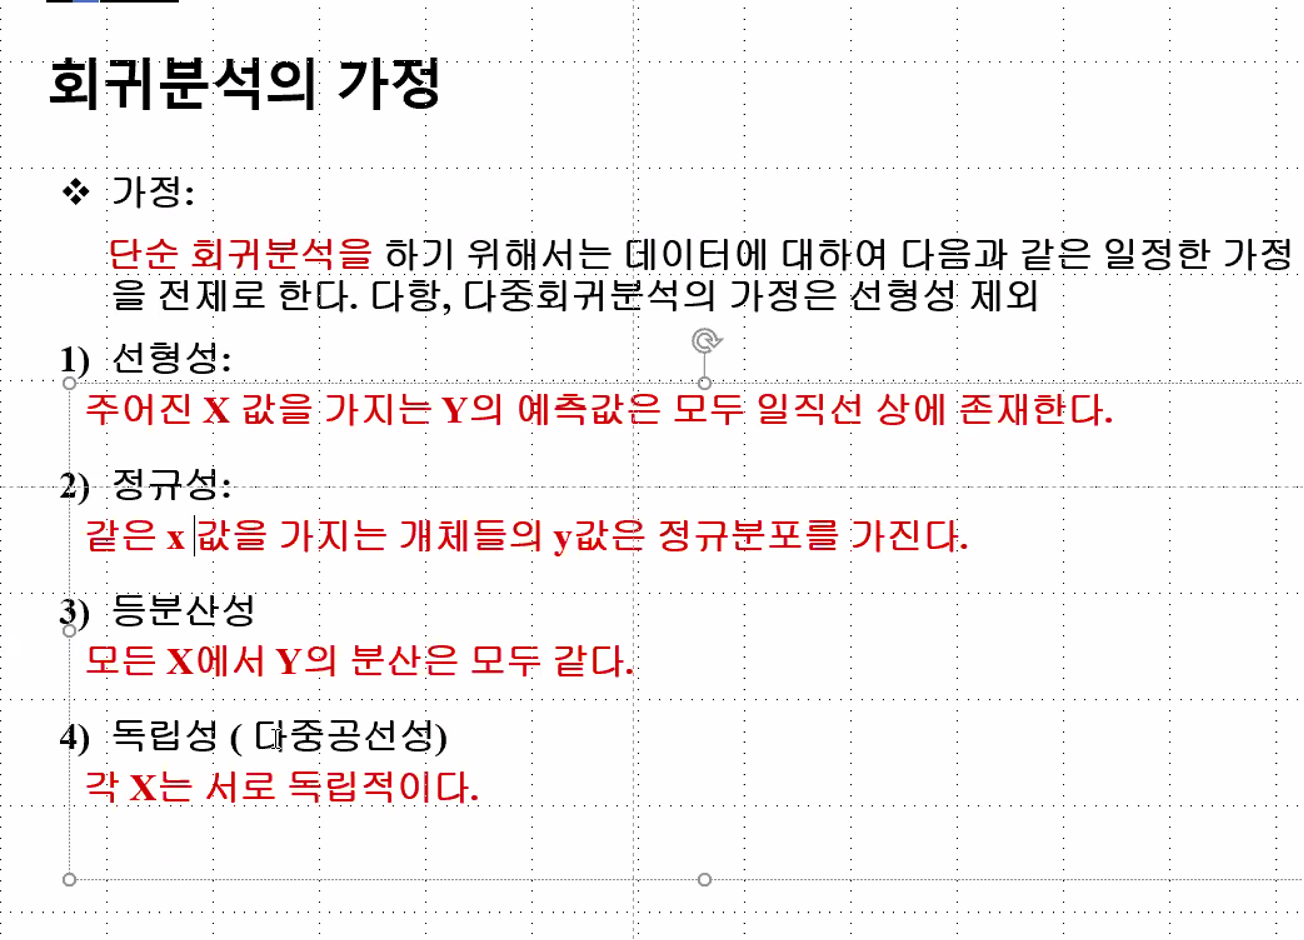

독립성 테스트가 있긴 한데 . 그냥 사용한다? 
여러분은 정규성 등분산성을 확인하면된다. 

# 단순 회귀 분석
Galtn의 데이터  :928개의 부모의 키와 아이의 키에 대한 자료, 부모의 키 : 아빠, 엄마*1.08

In [1]:
install.packages('survival')

package 'survival' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\k016k\AppData\Local\Temp\Rtmp6XRSWF\downloaded_packages


In [2]:
require(UsingR)

Loading required package: UsingR
Warning message:
"package 'UsingR' was built under R version 3.6.3"Loading required package: MASS
Loading required package: HistData
Warning message:
"package 'HistData' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'UsingR'

The following object is masked from 'package:survival':

    cancer



In [136]:
detach_package <- function(pkg, character.only = FALSE)
{
  if(!character.only)
  {
    pkg <- deparse(substitute(pkg))
  }
  search_item <- paste("package", pkg, sep = ":")
  while(search_item %in% search())
  {
    detach(search_item, unload = TRUE, character.only = TRUE)
  }
}

In [137]:
detach_package(UsingR)

'data.frame':	928 obs. of  2 variables:
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...


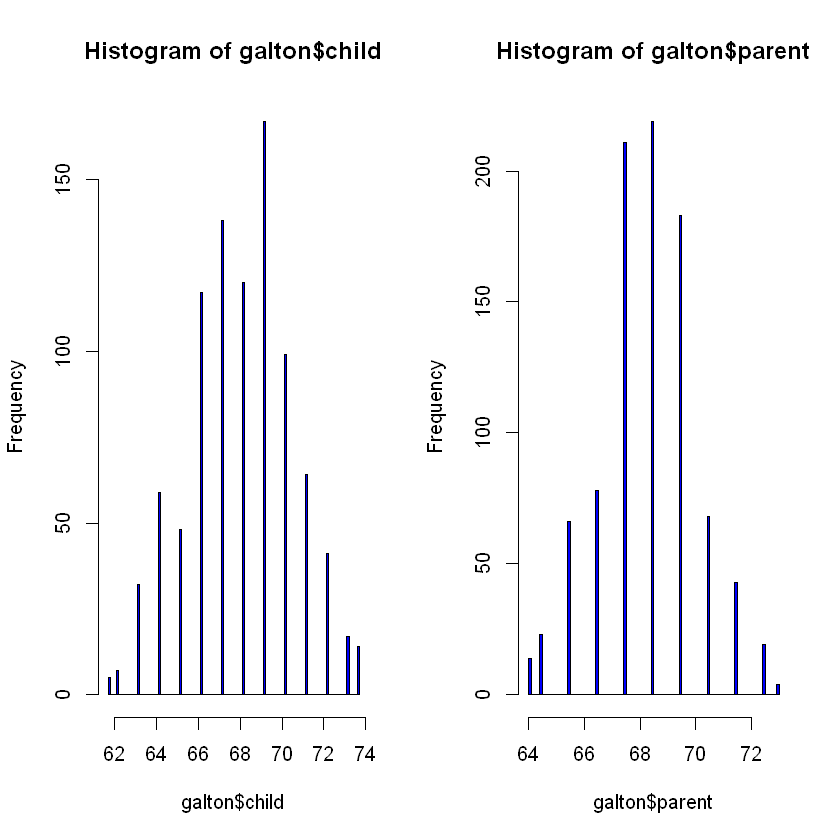

In [4]:
data(galton)
str(galton)
par(mfrow =c(1,2))
hist(galton$child, col = "blue", breaks=100)
hist(galton$parent, col="blue", breaks=100)

In [5]:
cor.test(galton$child, galton$parent) # 두 변수사이의 상관관계를 보여준다. 1에 가까울수록 양의 상관관계 
#-1에 가까워질수록 음의 상관관계


	Pearson's product-moment correlation

data:  galton$child and galton$parent
t = 15.711, df = 926, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4064067 0.5081153
sample estimates:
      cor 
0.4587624 


In [6]:
xtabs(~child+parent, data = galton)

      parent
child  64 64.5 65.5 66.5 67.5 68.5 69.5 70.5 71.5 72.5 73
  61.7  1    1    1    0    0    1    0    1    0    0  0
  62.2  0    1    0    3    3    0    0    0    0    0  0
  63.2  2    4    9    3    5    7    1    1    0    0  0
  64.2  4    4    5    5   14   11   16    0    0    0  0
  65.2  1    1    7    2   15   16    4    1    1    0  0
  66.2  2    5   11   17   36   25   17    1    3    0  0
  67.2  2    5   11   17   38   31   27    3    4    0  0
  68.2  1    0    7   14   28   34   20   12    3    1  0
  69.2  1    2    7   13   38   48   33   18    5    2  0
  70.2  0    0    5    4   19   21   25   14   10    1  0
  71.2  0    0    2    0   11   18   20    7    4    2  0
  72.2  0    0    1    0    4    4   11    4    9    7  1
  73.2  0    0    0    0    0    3    4    3    2    2  3
  73.7  0    0    0    0    0    0    5    3    2    4  0

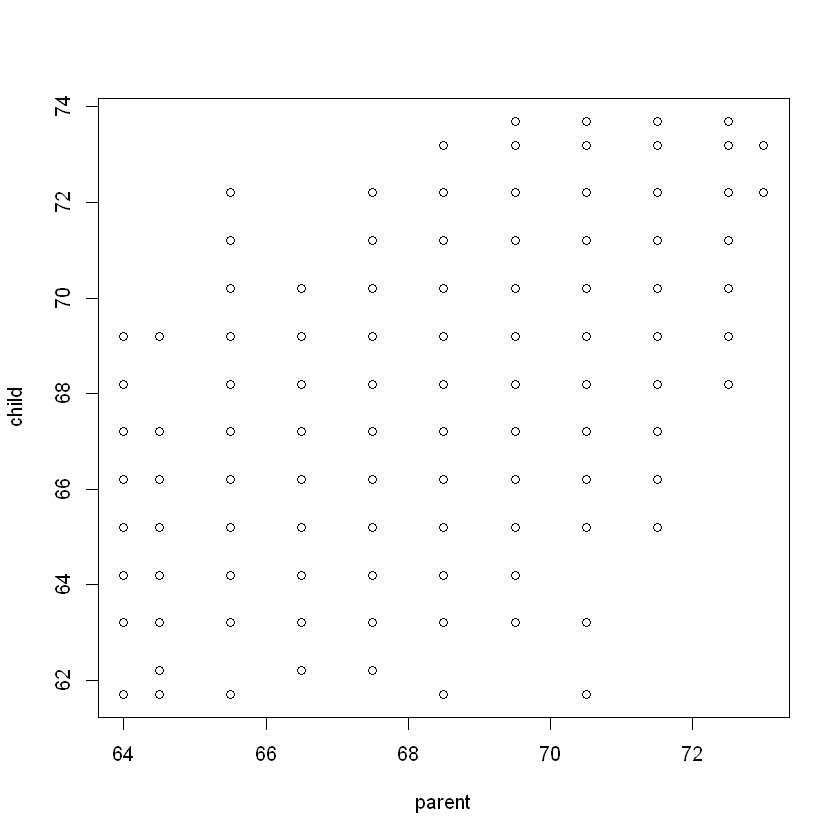

In [10]:
plot(child~parent,data = galton) #넓게 퍼졌지만 증가하는 패턴을 보인다(양의 상관관계를 가진다.)

In [8]:
#회귀분석은 lm이라는 함수를 쓴다. 
out = lm(child~parent, data=galton)
summary(out)


Call:
lm(formula = child ~ parent, data = galton)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8050 -1.3661  0.0487  1.6339  5.9264 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.94153    2.81088   8.517   <2e-16 ***
parent       0.64629    0.04114  15.711   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.239 on 926 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2096 
F-statistic: 246.8 on 1 and 926 DF,  p-value: < 2.2e-16


### 모형에 대한 회귀진단

1. 유의한 모형인가. p-value : 0.05보다 작으면 유의하것 
    parent가 유의하면 모델이 유의하게 나오고 
    다중회귀에서는 그중 하나가 유의하면 모델이  유의하게 나온다. 

2. y = 베타 x +알파. 

3. adjusted R-squared : correaltion 의 제곱값 

child는 0.64*설명변수 + 23.9 --> 이 모델이 child라는 종속변수를 얼마나 예측 잘하느냐. 척도가 있는데 adjusted R-squared. correlation 값의 제곱값. 
이 모델은 설명력을 고려했을대 좋은 모델은 아니다. 

In [12]:
abline(out,col="red")

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


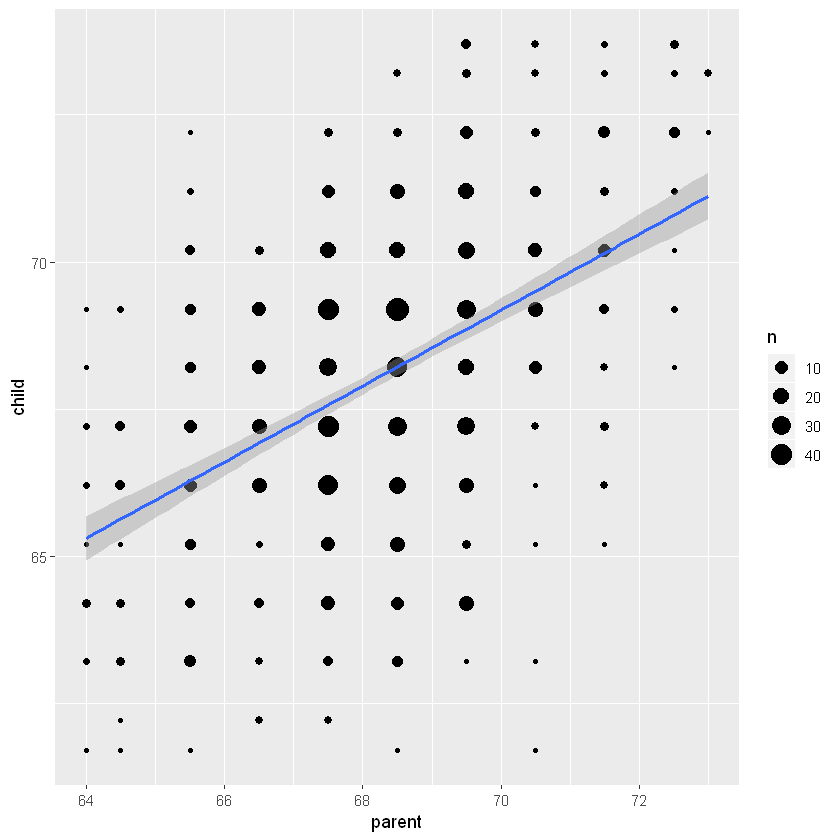

In [13]:
require(ggplot2)
ggplot(data=galton, aes(x=parent, y= child)) + geom_count() + geom_smooth(method = "lm")

# 다항회귀 분석

In [14]:
women # 내장된 데이터 
cor.test(women$weight, women$height)

height,weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142



	Pearson's product-moment correlation

data:  women$weight and women$height
t = 37.855, df = 13, p-value = 1.091e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9860970 0.9985447
sample estimates:
      cor 
0.9954948 


      height
weight 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
   115  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   117  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   120  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   123  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   126  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   129  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   132  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   135  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   139  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   142  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   146  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   150  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   154  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   159  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   164  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


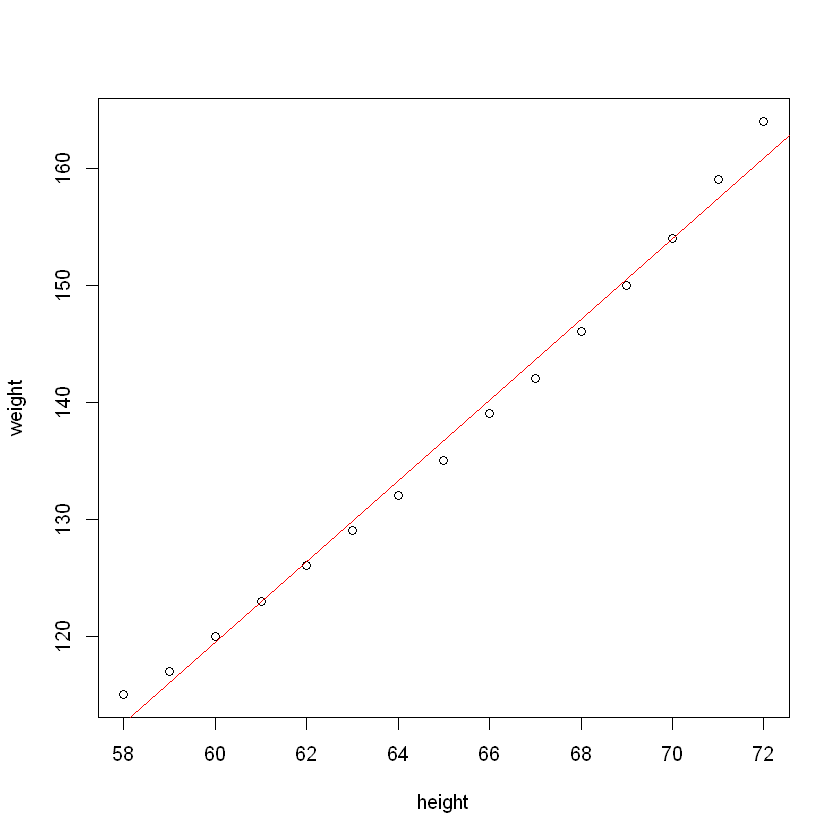

In [18]:
xtabs(~weight+height, data=women)
plot(weight~height, data=women)
out = lm(weight~height, data=women)
summary(out)
abline(out, col="red")


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


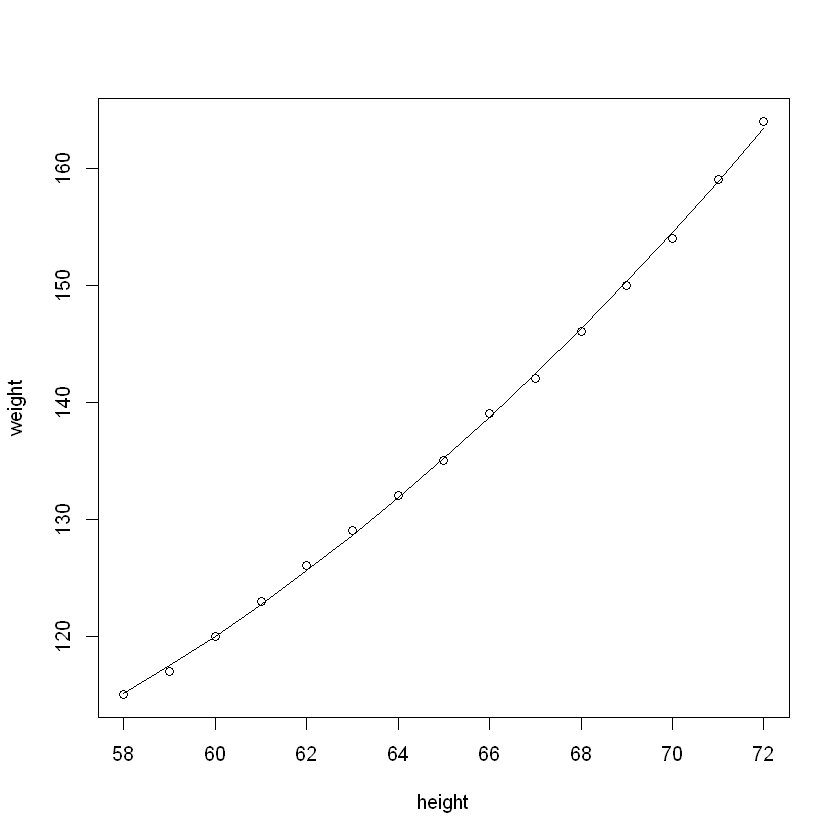

In [19]:
plot(weight~height, data=women)
out2 = lm(weight~height + I(height^2), data=women) # I라는것은 뭐냐 I는 없는 변수인데 뭔가 조작을 한거다. 
summary(out2)
lines(women$height, fitted(out2))

# 다중회귀분석
1. Data탐색 및 변환
2. 이상치 제거
3. 회귀 모형 -FULL MODEL
4. 회귀 진단 -정규성, 선형성, 등분산성, 독립성(다중공선성)
5. 회귀모형 적합
6. 예측


### 1. daTA 탐색 및 변환


In [2]:
require(MASS)
birthwt$race = factor(birthwt$race)
birthwt$ht = factor(birthwt$ht)
birthwt$smoke = factor(birthwt$smoke)
birthwt$low = factor(birthwt$low)
birthwt$ui = factor(birthwt$ui)
str(birthwt)
out = lm(bwt ~ age+lwt+race+low+ftv+smoke+ptl+ht+ui+ftv+low, data = birthwt)
summary(out)

Loading required package: MASS


'data.frame':	189 obs. of  10 variables:
 $ low  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : Factor w/ 3 levels "1","2","3": 2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ ui   : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 1 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...
 $ bwt  : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...



Call:
lm(formula = bwt ~ age + lwt + race + low + ftv + smoke + ptl + 
    ht + ui + ftv + low, data = birthwt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1009.47  -303.11    -5.35   289.81  1659.81 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3499.137    211.392  16.553  < 2e-16 ***
age            -7.706      6.400  -1.204 0.230161    
lwt             1.502      1.169   1.285 0.200353    
race2        -240.604    101.032  -2.381 0.018299 *  
race3        -193.661     77.017  -2.515 0.012806 *  
low1        -1118.429     74.198 -15.074  < 2e-16 ***
ftv            -6.984     30.888  -0.226 0.821370    
smoke1       -173.235     71.756  -2.414 0.016781 *  
ptl            81.114     68.317   1.187 0.236682    
ht1          -183.072    137.190  -1.334 0.183766    
ui1          -340.982     93.036  -3.665 0.000326 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 432.2 on 178 degrees of fre

###  정규성 , 등분산성 테스트


In [ ]:
# install.packages("lmtest")
require("lmtest")

In [22]:
#. 정규성 , 등분산성 테스트
shapiro.test(resid(out)) # 0.1023 > 0.05 정규성을 만족한다. 
bptest(out) #0.005817 < 0.05 이므로 등분산성을만족하지 않는다.



	Shapiro-Wilk normality test

data:  resid(out)
W = 0.98776, p-value = 0.1023



	studentized Breusch-Pagan test

data:  out
BP = 24.761, df = 10, p-value = 0.005817


###  다중 공선성 진단 - 해당 데이터에서는 다중 공선성 의심 변수 존재하지 않음


In [ ]:
# install.packages("psych")

In [25]:
# install.packages('mnormt') # package ‘mnormt’ is not available (for R version 3.6.2)

Warning message:
"package 'mnormt' is not available (for R version 3.6.1)"

In [24]:
#다중 공선성 진단 - 해당 데이터에서는 다중 공선성 의심 변수 존재하지 않음
require("car")
require("psych")
require("mnormt")

Loading required package: psych
Warning message:
"package 'psych' was built under R version 3.6.3"Error: package or namespace load failed for 'psych' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mnormt'
Loading required package: mnormt
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'mnormt'"

In [26]:
#pairs.panels(birthwt) # 다중 공선성 진단 --> 그래프를 통해 
vif(out)#다중 공선성 : 보통 4가 넘으면 다중 공선성 의심

,GVIF,Df,GVIF^(1/(2*Df))
age,1.157196,1,1.075730
lwt,1.285811,1,1.133936
race,1.383840,2,1.084605
low,1.195889,1,1.093567
ftv,1.077301,1,1.037931
smoke,1.240946,1,1.113978
ptl,1.143091,1,1.069154
ht,1.132176,1,1.064038
ui,1.105102,1,1.051239


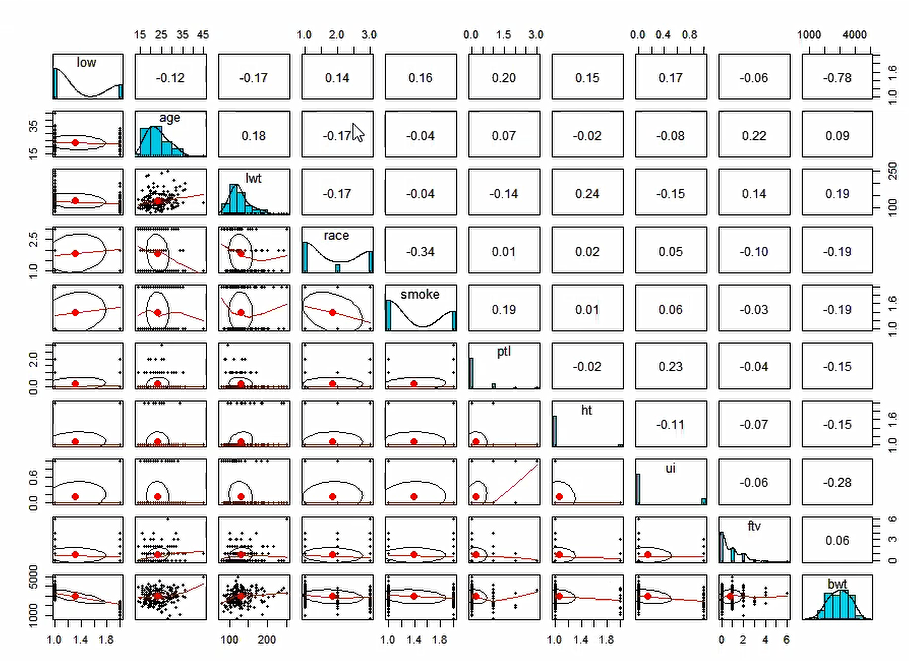

#### plot을 해보니 row번호 226이 확연한 이상치다.(정렬이 안되있으므로 130번째 row임을 확인할 수 있다.) 


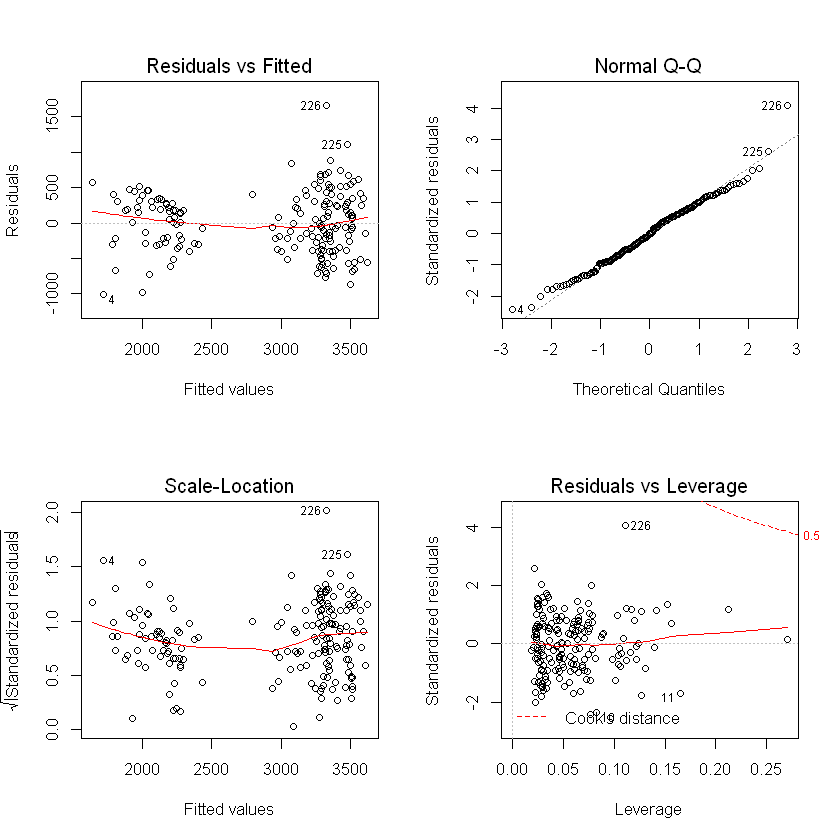

In [27]:
par(mfrow = c(2,2))
plot(out)

### 이상치 제거 후 모형 적합


In [28]:
#이상치 제거 후 모형 적합
out = lm(bwt ~ age+lwt+race+low+ftv+smoke+ptl+ht+ui, data = birthwt[-c(130),])
summary(out)


Call:
lm(formula = bwt ~ age + lwt + race + low + ftv + smoke + ptl + 
    ht + ui, data = birthwt[-c(130), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-985.04 -274.13  -13.87  262.53 1146.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3607.5404   203.4653  17.730  < 2e-16 ***
age           -16.0321     6.4159  -2.499 0.013373 *  
lwt             1.9317     1.1208   1.723 0.086545 .  
race2        -247.0241    96.4935  -2.560 0.011302 *  
race3        -178.2097    73.6379  -2.420 0.016528 *  
low1        -1116.3933    70.8578 -15.755  < 2e-16 ***
ftv            -0.3519    29.5378  -0.012 0.990509    
smoke1       -157.7041    68.6205  -2.298 0.022719 *  
ptl            95.9825    65.3329   1.469 0.143573    
ht1          -185.2778   131.0126  -1.414 0.159060    
ui1          -340.0918    88.8465  -3.828 0.000179 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 412.8 on 177 degrees of fr

### 모형을 축소해보자.  유효하지도 않고 기여도도 없는 설명변수를 제거한다.  ftv ptl ht 


In [29]:
#모형을 축소해보자.  유효하지도 않고 기여도도 없는 설명변수를 제거한다.  ftv ptl ht 
out2 = lm(bwt ~ age+lwt+race+low+smoke+ui, data = birthwt[-c(130),])
summary(out2)
anova(out2, out) # 0.2502 > 0.05이므로 두 모델간 유의미한 차이가 없다. --> 더 간단한 모델이 좋다. 


Call:
lm(formula = bwt ~ age + lwt + race + low + smoke + ui, data = birthwt[-c(130), 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-954.73 -301.29    2.58  277.81 1140.10 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3637.863    201.763  18.030  < 2e-16 ***
age           -14.328      6.250  -2.293 0.023033 *  
lwt             1.370      1.077   1.272 0.204988    
race2        -245.933     96.784  -2.541 0.011896 *  
race3        -177.605     73.651  -2.411 0.016895 *  
low1        -1123.222     69.089 -16.258  < 2e-16 ***
smoke1       -142.346     67.901  -2.096 0.037447 *  
ui1          -301.485     86.906  -3.469 0.000653 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414.1 on 180 degrees of freedom
Multiple R-squared:  0.6777,	Adjusted R-squared:  0.6652 
F-statistic: 54.08 on 7 and 180 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
180,30861547,NA,NA,NA,NA
177,30155827,3,705720,1.380744,0.2502408


In [30]:
# lwt 제거 #다중회귀분석 - 최종모델
out3 = lm(bwt ~age+race+low+smoke+ui,data = birthwt[-c(130),])
summary(out3)
anova(out3, out) # 0.2218> 0.05


Call:
lm(formula = bwt ~ age + race + low + smoke + ui, data = birthwt[-c(130), 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-949.4 -294.8   20.1  281.4 1110.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3790.52     162.47  23.331  < 2e-16 ***
age           -12.84       6.15  -2.088  0.03821 *  
race2        -221.14      94.96  -2.329  0.02098 *  
race3        -191.78      72.93  -2.630  0.00928 ** 
low1        -1134.79      68.61 -16.541  < 2e-16 ***
smoke1       -147.95      67.87  -2.180  0.03057 *  
ui1          -312.96      86.58  -3.614  0.00039 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414.8 on 181 degrees of freedom
Multiple R-squared:  0.6748,	Adjusted R-squared:  0.6641 
F-statistic: 62.61 on 6 and 181 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
181,31138987,NA,NA,NA,NA
177,30155827,4,983159.8,1.442667,0.2218365


### out3에 대해서 정규성, 등분산성, 다중공선성 테스트를 해보자. 

In [32]:
#out3에 대해서 정규성, 등분산성, 다중공선성 테스트를 해보자. 
#. 정규성 , 등분산성 테스트
shapiro.test(resid(out3)) # p-value:0.182>0.05이므로 정규성을 만족한다. 
bptest(out3) #p-value:0.1603 > 0.05 이므로 등분산성을만족한다.


	Shapiro-Wilk normality test

data:  resid(out3)
W = 0.98949, p-value = 0.182



	studentized Breusch-Pagan test

data:  out3
BP = 9.2449, df = 6, p-value = 0.1603


In [34]:
# pairs.panels(birthwt) # 다중 공선성 진단 --> 그래프를 통해 
vif(out3)#다중 공선성 : 보통 4가 넘으면 다중 공선성 의심 --> 4넘는게 없어서 다중 공선성이 없다. 

,GVIF,Df,GVIF^(1/(2*Df))
age,1.055752,1,1.027498
race,1.247636,2,1.056871
low,1.107564,1,1.052409
smoke,1.201601,1,1.096176
ui,1.038424,1,1.019031


### 변수선택법에 의한 모형적합
1. 최소한의 모델 만들기 - 절편만
2. 최소한의 모델에서 변수를 늘려가며 최적 모델 찾기 - forward
3. 최대 모델에서 변수를 줄여가며 최적 모델 찾기 - backward
4. 두 방향 모두 고려 - stepwise

In [3]:
fit.con = lm(bwt ~ 1, data = birthwt[-c(130),])
summary(fit.con)


Call:
lm(formula = bwt ~ 1, data = birthwt[-c(130), ])

Residuals:
     Min       1Q   Median       3Q      Max 
-2224.71  -520.71    43.29   542.79  1659.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2933.71      52.19   56.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 715.6 on 187 degrees of freedom


In [38]:
fit.forward <-step(fit.con,scope=list(lower=fit.con,upper=out),direction = "forward")
summary(fit.forward)

Start:  AIC=2472.5
bwt ~ 1

        Df Sum of Sq      RSS    AIC
+ low    1  60147205 35616484 2288.6
+ ui     1   7715906 88047783 2458.7
+ lwt    1   3574837 92188852 2467.3
+ race   2   4409082 91354607 2467.6
+ smoke  1   3194333 92569356 2468.1
+ ptl    1   2212402 93551287 2470.1
+ ht     1   2018980 93744709 2470.5
<none>               95763689 2472.5
+ ftv    1    306840 95456849 2473.9
+ age    1     90602 95673087 2474.3

Step:  AIC=2288.55
bwt ~ low

        Df Sum of Sq      RSS    AIC
+ ui     1   2242212 33374272 2278.3
+ race   2    762350 34854134 2288.5
<none>               35616484 2288.6
+ lwt    1    331372 35285112 2288.8
+ smoke  1    315102 35301382 2288.9
+ age    1    302960 35313524 2288.9
+ ht     1     61343 35555142 2290.2
+ ftv    1      4981 35611503 2290.5
+ ptl    1       636 35615848 2290.6

Step:  AIC=2278.33
bwt ~ low + ui

        Df Sum of Sq      RSS    AIC
+ race   2    770949 32603323 2277.9
+ age    1    395692 32978581 2278.1
<none>           


Call:
lm(formula = bwt ~ low + ui + race + smoke + age, data = birthwt[-c(130), 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-949.4 -294.8   20.1  281.4 1110.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3790.52     162.47  23.331  < 2e-16 ***
low1        -1134.79      68.61 -16.541  < 2e-16 ***
ui1          -312.96      86.58  -3.614  0.00039 ***
race2        -221.14      94.96  -2.329  0.02098 *  
race3        -191.78      72.93  -2.630  0.00928 ** 
smoke1       -147.95      67.87  -2.180  0.03057 *  
age           -12.84       6.15  -2.088  0.03821 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414.8 on 181 degrees of freedom
Multiple R-squared:  0.6748,	Adjusted R-squared:  0.6641 
F-statistic: 62.61 on 6 and 181 DF,  p-value: < 2.2e-16


In [39]:
fit.backward <-step(out,scope=list(lower=fit.con,upper=out),direction = "backward")
summary(fit.backward)

Start:  AIC=2275.26
bwt ~ age + lwt + race + low + ftv + smoke + ptl + ht + ui

        Df Sum of Sq      RSS    AIC
- ftv    1        24 30155851 2273.3
<none>               30155827 2275.3
- ht     1    340736 30496564 2275.4
- ptl    1    367721 30523548 2275.5
- lwt    1    506080 30661907 2276.4
- smoke  1    899861 31055689 2278.8
- age    1   1063798 31219625 2279.8
- race   2   1611993 31767820 2281.1
- ui     1   2496373 32652200 2288.2
- low    1  42291906 72447733 2438.0

Step:  AIC=2273.26
bwt ~ age + lwt + race + low + smoke + ptl + ht + ui

        Df Sum of Sq      RSS    AIC
<none>               30155851 2273.3
- ht     1    343510 30499361 2273.4
- ptl    1    368417 30524268 2273.6
- lwt    1    510136 30665988 2274.4
- smoke  1    900290 31056141 2276.8
- age    1   1104514 31260366 2278.0
- race   2   1613640 31769491 2279.1
- ui     1   2498022 32653874 2286.2
- low    1  42302141 72457992 2436.1



Call:
lm(formula = bwt ~ age + lwt + race + low + smoke + ptl + ht + 
    ui, data = birthwt[-c(130), ])

Residuals:
    Min      1Q  Median      3Q     Max 
-984.77 -273.94  -14.01  262.18 1146.46 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3607.717    202.355  17.829  < 2e-16 ***
age           -16.046      6.284  -2.553 0.011508 *  
lwt             1.930      1.112   1.735 0.084424 .  
race2        -247.016     96.220  -2.567 0.011074 *  
race3        -178.162     73.323  -2.430 0.016099 *  
low1        -1116.406     70.651 -15.802  < 2e-16 ***
smoke1       -157.682     68.401  -2.305 0.022307 *  
ptl            96.011     65.107   1.475 0.142069    
ht1          -185.124    130.008  -1.424 0.156213    
ui1          -340.061     88.559  -3.840 0.000171 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 411.6 on 178 degrees of freedom
Multiple R-squared:  0.6851,	Adjusted R-squared:  0.6692 
F-statis

In [4]:
fit.both <-step(fit.con, scope = list(lower = fit.con, upper = out), direction = "both")
summary(fit.both)

Start:  AIC=2472.5
bwt ~ 1

        Df Sum of Sq      RSS    AIC
+ low    1  60147205 35616484 2288.6
+ ui     1   7715906 88047783 2458.7
+ lwt    1   3574837 92188852 2467.3
+ race   2   4409082 91354607 2467.6
+ smoke  1   3194333 92569356 2468.1
+ ptl    1   2212402 93551287 2470.1
+ ht     1   2018980 93744709 2470.5
<none>               95763689 2472.5
+ ftv    1    306840 95456849 2473.9
+ age    1     90602 95673087 2474.3

Step:  AIC=2288.55
bwt ~ low

        Df Sum of Sq      RSS    AIC
+ ui     1   2242212 33374272 2278.3
+ race   2    762350 34854134 2288.5
<none>               35616484 2288.6
+ lwt    1    331372 35285112 2288.8
+ smoke  1    315102 35301382 2288.9
+ age    1    302960 35313524 2288.9
+ ht     1     61343 35555142 2290.2
+ ftv    1      4981 35611503 2290.5
+ ptl    1       636 35615848 2290.6
- low    1  60147205 95763689 2472.5

Step:  AIC=2278.33
bwt ~ low + ui

        Df Sum of Sq      RSS    AIC
+ race   2    770949 32603323 2277.9
+ age    1    395


Call:
lm(formula = bwt ~ low + ui + race + smoke + age, data = birthwt[-c(130), 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-949.4 -294.8   20.1  281.4 1110.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3790.52     162.47  23.331  < 2e-16 ***
low1        -1134.79      68.61 -16.541  < 2e-16 ***
ui1          -312.96      86.58  -3.614  0.00039 ***
race2        -221.14      94.96  -2.329  0.02098 *  
race3        -191.78      72.93  -2.630  0.00928 ** 
smoke1       -147.95      67.87  -2.180  0.03057 *  
age           -12.84       6.15  -2.088  0.03821 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414.8 on 181 degrees of freedom
Multiple R-squared:  0.6748,	Adjusted R-squared:  0.6641 
F-statistic: 62.61 on 6 and 181 DF,  p-value: < 2.2e-16


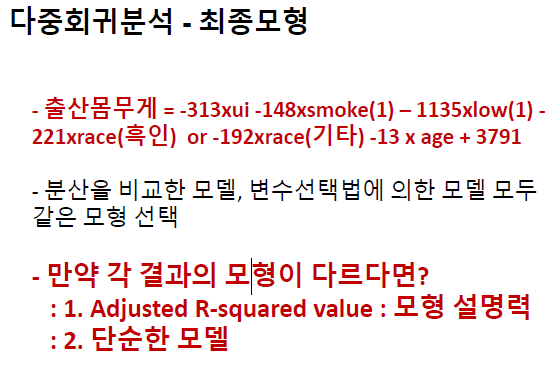

# 실제 데이터에 예측
1. it_value$Correct에1 or 0 입력
2. real_bwt 값이 lwr과 upr 사이일경우1 아닐경우0

-총합을 데이터 행수로 나눈것이 실제데이터에 적용한결과임. 예측구간은몇%의실제값을포함하는가?

In [28]:
Fit_value = predict(fit.both, newdata = birthwt, interval = "confidence") #무슨차이지?
Fit_value = predict(fit.both, newdata = birthwt, interval = "prediction")

real_bwt = birthwt$bwt

In [29]:
Fit_value = cbind(Fit_value, real_bwt)
Correct = NA
Fit_value = cbind(Fit_value, Correct)
head(Fit_value)
Fit_value = as.data.frame(Fit_value)

,fit,lwr,upr,real_bwt,Correct
85,3012.445,2159.618,3865.271,2523,NA
86,3174.999,2339.608,4010.390,2551,NA
87,3385.759,2558.000,4213.517,2557,NA
88,3059.959,2220.055,3899.862,2594,NA
89,3098.481,2256.610,3940.351,2600,NA
91,3329.086,2502.450,4155.721,2622,NA


In [30]:
str(Fit_value)

'data.frame':	189 obs. of  5 variables:
 $ fit     : num  3012 3175 3386 3060 3098 ...
 $ lwr     : num  2160 2340 2558 2220 2257 ...
 $ upr     : num  3865 4010 4214 3900 3940 ...
 $ real_bwt: num  2523 2551 2557 2594 2600 ...
 $ Correct : num  NA NA NA NA NA NA NA NA NA NA ...


In [31]:
Fit_value$Correct = ifelse(Fit_value$real_bwt >= Fit_value$lwr & 
                           Fit_value$real_bwt <= Fit_value$upr, "T", "F" )

In [32]:
sum(Fit_value$Correct == "T")/dim(Fit_value)[1]

[1] 0.957672

### 실제 데이터에 예측 시각화는? 한번쯤 생각해봅시다. 

https://rpubs.com/kdomijan/325930

### 최종모형에  대하여 회귀진단 하시오  연습해봅시다. 

# 로지스틱 회귀분석 - 내가 관심있는 종속변수가 범주형 변수라면?
1. Data 탐색및변환
2. 이상치제거
3. 회귀모형–Full model
4. 다중공선성(나머지가정은의미없음)
5. 회귀모형적합및평가
6. 적합도검정, ROC 커브등ㅡ
7. 예측

In [35]:
install.packages("aod", dependencies=T)

package 'aod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\k016k\AppData\Local\Temp\RtmpQtE0JN\downloaded_packages


In [72]:
library(aod)
mydata <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(mydata)
summary(mydata)
str(mydata)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


In [73]:
sapply(mydata,sd)

admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602

In [74]:
mydata$rank = factor(mydata$rank)

In [75]:
dim(mydata)

[1] 400   4

In [76]:
train = mydata[1:280, ]
test = data[281:400,]
model = glm(admit ~ gre + gpa + rank, data = train, family = "binomial")
summary(model)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7077  -0.8318  -0.5860   1.0503   2.2382  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.734022   1.477295  -3.205 0.001353 ** 
gre          0.003438   0.001359   2.530 0.011409 *  
gpa          0.851776   0.424276   2.008 0.044686 *  
rank2       -0.723858   0.397572  -1.821 0.068653 .  
rank3       -1.626651   0.427016  -3.809 0.000139 ***
rank4       -1.811915   0.516683  -3.507 0.000453 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.59  on 279  degrees of freedom
Residual deviance: 306.82  on 274  degrees of freedom
AIC: 318.82

Number of Fisher Scoring iterations: 4


In [ ]:
1. 모든설명변수가유의하게입학(종속변수)에영향
2. GPA가1증가하면입학확률이exp(0.851776) 배만큼증가
3. Rank는더미변수(범주형)으로서1순위에비해입학확률이어떻게변하는지알려줌.
4. 예를들어Rank3의경우exp(-1.626651) 이므로1순위Rank학교에비해3순위는입학확률이0.20배증가-> 80%감소

In [ ]:
rank2가 유의하지 않다고 나온다. 범주형 변수같은 경우에는 카테고리별로 나오는데 그것중에 하나라도 유의하면 유의하다라고 본다. 
극단적으로 0.9..라고 나온다면 모를까. 
모든 설명변수가 특정카테고리가 유의하지 않다고해서 빼버리는 경우는 없다. 
gpa가 1증가하면 입학확률이 2.34배만큼 증가한다. rank는 카테고리 
1순위에 대해서 어떻게 변하는지 알려준다. 
rank3같은 경우는 1순위에 비해서 입학확률이 이만큼밖에 안된다. 
rank3인 
로지스틱에서는 r sqaure값이 보이지 않는다.

In [50]:
exp(coef(model))

(Intercept)         gre         gpa       rank2       rank3       rank4 
0.008791041 1.003443614 2.343806077 0.484878188 0.196586914 0.163341038

### - 로지스틱모델에서R-squared 값을대체할수있는값은Mcfadden R2
-pscl패키지사용

In [53]:
# install.packages("pscl")
library(pscl)
pR2(model)

fitting null model for pseudo-r2


llh      llhNull           G2     McFadden         r2ML         r2CU 
-153.4091694 -174.2963378   41.7743368    0.1198371    0.1385981    0.1946461

In [57]:
require("car")
require("psych")
vif(model) # 4를 넘기지 않음으로. 다중 공선성 값이 존재 하지 않는다. modified된 vif값이다. 

Loading required package: psych
Warning message:
"package 'psych' was built under R version 3.6.3"Error: package or namespace load failed for 'psych' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mnormt'


,GVIF,Df,GVIF^(1/(2*Df))
gre,1.122099,1,1.059292
gpa,1.183742,1,1.087999
rank,1.059592,3,1.009694


### 변수 선택

In [70]:
out1 = step(object = model, direction = "forward")
out2 = step(object = model, direction = "backward")
out3 = step(object = model, direction = "both")
summary(out1)
summary(out2)
summary(out3)

Start:  AIC=318.82
admit ~ gre + gpa + rank

Start:  AIC=318.82
admit ~ gre + gpa + rank

       Df Deviance    AIC
<none>      306.82 318.82
- gpa   1   310.94 320.94
- gre   1   313.48 323.48
- rank  3   328.62 334.62
Start:  AIC=318.82
admit ~ gre + gpa + rank

       Df Deviance    AIC
<none>      306.82 318.82
- gpa   1   310.94 320.94
- gre   1   313.48 323.48
- rank  3   328.62 334.62



Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7077  -0.8318  -0.5860   1.0503   2.2382  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.734022   1.477295  -3.205 0.001353 ** 
gre          0.003438   0.001359   2.530 0.011409 *  
gpa          0.851776   0.424276   2.008 0.044686 *  
rank2       -0.723858   0.397572  -1.821 0.068653 .  
rank3       -1.626651   0.427016  -3.809 0.000139 ***
rank4       -1.811915   0.516683  -3.507 0.000453 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.59  on 279  degrees of freedom
Residual deviance: 306.82  on 274  degrees of freedom
AIC: 318.82

Number of Fisher Scoring iterations: 4



Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7077  -0.8318  -0.5860   1.0503   2.2382  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.734022   1.477295  -3.205 0.001353 ** 
gre          0.003438   0.001359   2.530 0.011409 *  
gpa          0.851776   0.424276   2.008 0.044686 *  
rank2       -0.723858   0.397572  -1.821 0.068653 .  
rank3       -1.626651   0.427016  -3.809 0.000139 ***
rank4       -1.811915   0.516683  -3.507 0.000453 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.59  on 279  degrees of freedom
Residual deviance: 306.82  on 274  degrees of freedom
AIC: 318.82

Number of Fisher Scoring iterations: 4



Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7077  -0.8318  -0.5860   1.0503   2.2382  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.734022   1.477295  -3.205 0.001353 ** 
gre          0.003438   0.001359   2.530 0.011409 *  
gpa          0.851776   0.424276   2.008 0.044686 *  
rank2       -0.723858   0.397572  -1.821 0.068653 .  
rank3       -1.626651   0.427016  -3.809 0.000139 ***
rank4       -1.811915   0.516683  -3.507 0.000453 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.59  on 279  degrees of freedom
Residual deviance: 306.82  on 274  degrees of freedom
AIC: 318.82

Number of Fisher Scoring iterations: 4


### 모형적합도 

In [66]:
# install.packages("rms")

In [65]:
require(rms)
lrm(model)

Logistic Regression Model
 
 lrm(formula = model)
 
                       Model Likelihood     Discrimination    Rank Discrim.    
                          Ratio Test           Indexes           Indexes       
 Obs           280    LR chi2      41.77    R2       0.195    C       0.731    
  0            192    d.f.             5    g        1.045    Dxy     0.461    
  1             88    Pr(> chi2) <0.0001    gr       2.845    gamma   0.462    
 max |deriv| 6e-05                          gp       0.199    tau-a   0.200    
                                            Brier    0.184                     
 
           Coef    S.E.   Wald Z Pr(>|Z|)
 Intercept -4.7340 1.4773 -3.20  0.0014  
 gre        0.0034 0.0014  2.53  0.0114  
 gpa        0.8518 0.4243  2.01  0.0447  
 rank=2    -0.7239 0.3976 -1.82  0.0687  
 rank=3    -1.6267 0.4270 -3.81  0.0001  
 rank=4    -1.8119 0.5167 -3.51  0.0005  
 

model likelihood p-value <0.0001이므로 모형이 적합하다. 

### 로지스틱 회귀 - 실제 데이터 예측

In [78]:
p =  predict(model, newdata=test, type = "response")
round(p)
Pval = table(round(p), test$admit)
Pval
(Pval[1,1] + Pval[2,2])/sum(Pval)

ERROR: Error in eval(predvars, data, env): 객체 'gre'를 찾을 수 없습니다


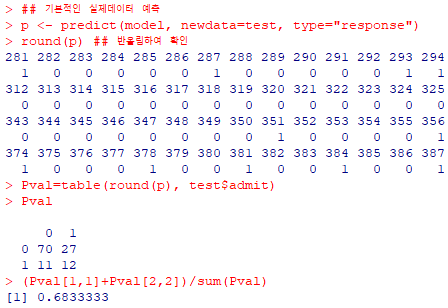

-68%의실제입학여부와예측입학여부가일치.
-하지만True positive 비율은낮음(12/39=31%)

In [80]:
# install.packages("ROCR")
require("ROCR")
p = predict(model, newdata=test, type ="response")
pr = prediction(p, test$admit)
prf = performance(pr, measure ="tpr", x.measure = "fpr")
plot(prf)

auc = performance(pr, measure = "auc")
auc = auc@y.values[[1]]
auc
fgd

ERROR: Error in eval(predvars, data, env): 객체 'gre'를 찾을 수 없습니다


이건 수업때 안함
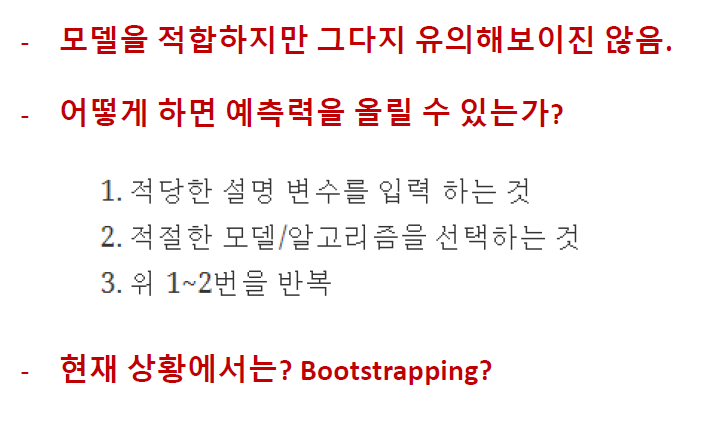